<a href="https://colab.research.google.com/github/rayeeed/UFP_Project/blob/main/AQ_Prediction_Dhaka_dataset_UFP_old.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
#from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score,cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectFromModel
from time import time
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import (HuberRegressor,
                              	RANSACRegressor, TheilSenRegressor)
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=bba47e1b74cb4eaddeb4714c7bacc81b0f868de859397a491b0ff7715fc4fa5b
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.4.3

Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1-py3.10-nspkg.pth
    /usr/local/lib/python3.10/dist-packages/matplotlib-3.7.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/matplotlib/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.10/dist-packages/pylab.py
Proceed (Y/n)? Y
Y
  Successfully uninstalled matplotlib-3.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for matplotlib: filename=matplotlib-3.4.3-cp310-cp310-linux_x86_64.whl size=10523215 sha256=29a4f0025528ed59ea48838977e12b29e1002f9c31e1429

In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 9.5 MB/s eta 0:00:00


In [ ]:
# Load the data
df = pd.read_excel('/content/drive/MyDrive/datasets_Rayeed_GSV_POI_LU/model_35.xlsx', index_col='site_name')
df.drop(['Site_type','OID'],inplace=True, axis=1)
# y = df.PNC
# X = df.drop(['PNC'], axis=1)

# # Scale the features
# trans = StandardScaler()
# X_st = trans.fit_transform(X)
# X_st = pd.DataFrame(X_st, columns=X.columns, index=X.index)


In [ ]:
df.columns

Index(['Site_type', 'OID', 'Mean PNC (# / cm3)', 'Mean PM2.5 (µg/m3)',
       'gsv_wall_p100', 'gsv_building_p100', 'gsv_house_p100',
       'gsv_awning_p100', 'gsv_sky_p100', 'gsv_earth_p100',
       ...
       'pop_1500', 'build_100', 'build_150', 'build_250', 'build_500',
       'build_750', 'build_1000', 'build_1250', 'build_1500', 'distPrim'],
      dtype='object', length=361)

In [ ]:
!pip install optuna
import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.9 MB/s eta 0:00:00


In [ ]:
y = df['Mean PNC (# / cm3)']
X = df.drop(['Mean PNC (# / cm3)','Mean PM2.5 (µg/m3)'], axis=1)

In [ ]:
y

site_name
Aftabnagar              60300
Agashadek_road          60800
Airport                 56900
Azimpur                 48400
Baridhara               46000
BUET                    24900
Chandrima_park          23800
Dhanmondi_lake_park     30200
Elephant_road           69000
Eskaton                 67600
Farmgate                77200
Gulisthan               84800
Hatirjhil               43600
Jamuna_future_park      64000
Khilgaon                51400
Lalbag                  58100
Mirpur_1                68600
Mirpur_DOHS             47600
Mirpur_Milk Vita        83200
Mohakhali               65100
Mohammadpur             47600
Mouchak                109800
New_market              67500
Niketan_park            30000
Rampura                 83100
Romna_park              57700
Shangsad_bhaban         68000
Shimanto_square         49100
Square_hospital         52600
Technical               92000
Tejgaon                 43300
TSC_DU                  65900
US_Embassy              65700


In [ ]:
# Scale the features
trans = StandardScaler()
X_st = trans.fit_transform(X)
X_st = pd.DataFrame(X_st, columns=X.columns, index=X.index)

In [ ]:
X_Pred = pd.read_excel('/content/drive/MyDrive/datasets_Rayeed_GSV_POI_LU/combined_total_v4.0.xlsx', index_col='OID_')

In [ ]:
col=X.columns
X_Pred_f1 = X_Pred[col]
X_Pred_f2= X_Pred_f1

In [ ]:
x_pred_st= trans.transform(X_Pred_f2)
x_pred_st = pd.DataFrame(x_pred_st, columns = X_Pred_f2.columns,index=X_Pred_f2.index)

# **OLS**

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 21.770s
r2 score for train data in LR: 0.48499953132817664
cross validation r2 score:
0.4081639726874099
r2 score for train data in LR: 0.5984658109846557
cross validation r2 score:
0.4976269030479651
r2 score for train data in LR: 0.6491652155010075
cross validation r2 score:
0.5605406838179356
r2 score for train data in LR: 0.7159896925893189
cross validation r2 score:
0.6345204095151398
r2 score for train data in LR: 0.7658380942914593
cross validation r2 score:
0.6295653918887039
r2 score for train data in LR: 0.8330581082624648
cross validation r2 score:
0.7724593652824674
r2 score for train data in LR: 0.88208322407378
cross validation r2 score:
0.8161499682234445
r2 score for train data in LR: 0.9011287947202489
cross validation r2 score:
0.8220632504123827
r2 score for train data in 

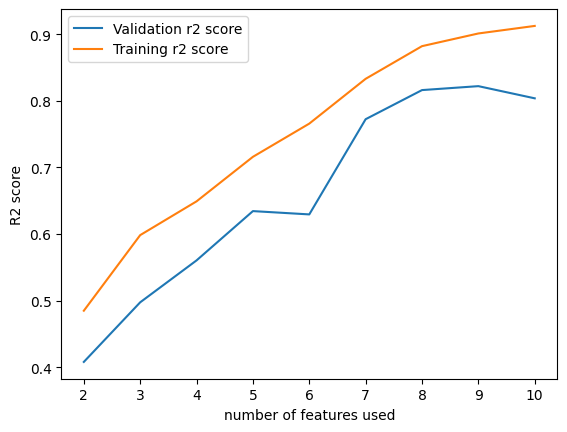

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]
  LR = LinearRegression()
  feature_names = np.array(X_st.columns)

  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  selector = RFE(LR, n_features_to_select=x,step=1)
  selector.fit(X_st, y)
  print(f"selected features: {x}")
  selected_features = X_st.columns[selector.support_]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=LinearRegression()
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')

  predicted= cross_val_predict(model, X_Train, y, cv=10)

  scores = r2_score(y, predicted)


  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error')
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['gsv_grass_p100', 'RdAll_150'],
 ['gsv_grass_p100', 'gsv_plant_p250', 'RdAll_150'],
 ['gsv_grass_p100', 'gsv_plant_p250', 'RdAll_150', 'rest_s250'],
 ['gsv_grass_p100',
  'gsv_plant_p250',
  'gsv_poster_p250',
  'RdAll_150',
  'rest_s250'],
 ['gsv_grass_p100',
  'gsv_plant_p250',
  'gsv_poster_p250',
  'RdAll_150',
  'RdclS_500',
  'rest_s250'],
 ['gsv_grass_p100',
  'gsv_plant_p250',
  'gsv_poster_p250',
  'gsv_minibike_p1000',
  'RdAll_150',
  'RdclS_500',
  'rest_s250'],
 ['gsv_grass_p100',
  'gsv_plant_p250',
  'gsv_poster_p250',
  'gsv_sidewalk_p500',
  'gsv_minibike_p1000',
  'RdAll_150',
  'RdclS_500',
  'rest_s250'],
 ['gsv_grass_p100',
  'gsv_fence_p150',
  'gsv_plant_p250',
  'gsv_poster_p250',
  'gsv_sidewalk_p500',
  'gsv_minibike_p1000',
  'RdAll_150',
  'RdclS_500',
  'rest_s250'],
 ['gsv_grass_p100',
  'gsv_fence_p150',
  'gsv_plant_p250',
  'gsv_poster_p250',
  'gsv_sidewalk_p500',
  'gsv_minibike_p1000',
  'RdAll_150',
  'RdclT_150',
  'RdclS_500',
  'rest_s250']]

In [ ]:

lst1=['gsv_grass_p100',
  'gsv_plant_p250',
  'gsv_poster_p250',
  'RdAll_150',
  'rest_s250']

model= LinearRegression()

X_train= X_st[lst1]

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

r2 score for train data in LR: 0.7159896925893189
cross validation r2 score: 0.6345204095151398


actual     predicted
site_name                                
Aftabnagar            60300  49104.173364
Agashadek_road        60800  65779.330377
Airport               56900  55522.521912
Azimpur               48400  49918.700206
Baridhara             46000  38170.908039
BUET                  24900  38988.086939
Chandrima_park        23800  26294.351740
Dhanmondi_lake_park   30200  44258.518625
Elephant_road         69000  58862.750666
Eskaton               67600  68232.763366
Farmgate              77200  69477.924025
Gulisthan             84800  87178.863085
Hatirjhil             43600  68738.806270
Jamuna_future_park    64000  65929.396397
Khilgaon              51400  65226.751850
Lalbag                58100  48476.322375
Mirpur_1              68600  61538.206014
Mirpur_DOHS           47600  36962.514658
Mirpur_Milk Vita      83200  73683.883381
Mohakhali             65100  78514.677106
Mohammadpur           47600  53843.661307
Mouchak              109800  76598.027602
New_market            67500  59910.575491
Niketan_park          30000  24958.031422
Rampura               83100  81167.229893
Romna_park            57700  71767.681412
Shangsad_bhaban       68000  57798.092825
Shimanto_square       49100  52283.809038
Square_hospital       52600  61408.342267
Technical             92000  75285.571625
Tejgaon               43300  59352.899493
TSC_DU                65900  58162.490701
US_Embassy            65700  73981.835887
Uttara_Sector1        35100  28675.415617
Uttara_Sector7        27500  46802.916807

gsv_grass_p100    -0.414549
gsv_plant_p250    -1.031502
gsv_poster_p250   -0.547831
RdAll_150         -1.409728
rest_s250         -0.825280
dtype: float64
gsv_grass_p100     4.921248
gsv_plant_p250     2.978259
gsv_poster_p250    4.283752
RdAll_150          2.036422
rest_s250          3.113558
dtype: float64
training r2 score: 0.7159896925893189
training RMSE: 10362.729431331098
training nRMSE: 0.12049685385268719
cross validation r2 score: 0.6345204095151398
cross validation RMSE: 11755.434143486236
cross validation nRMSE: 0.13669109469170043
Minimum prediction value: 6735.173821336852
Corresponding row: prediction    6735.173821
Latitude        23.774994
Longitude       90.378387
Name: 5652, dtype: float64
Minimum prediction value: 104524.93170326872
Corresponding row: prediction    104524.931703
Latitude          23.731598
Longitude         90.421692
Name: 3468, dtype: float64
0


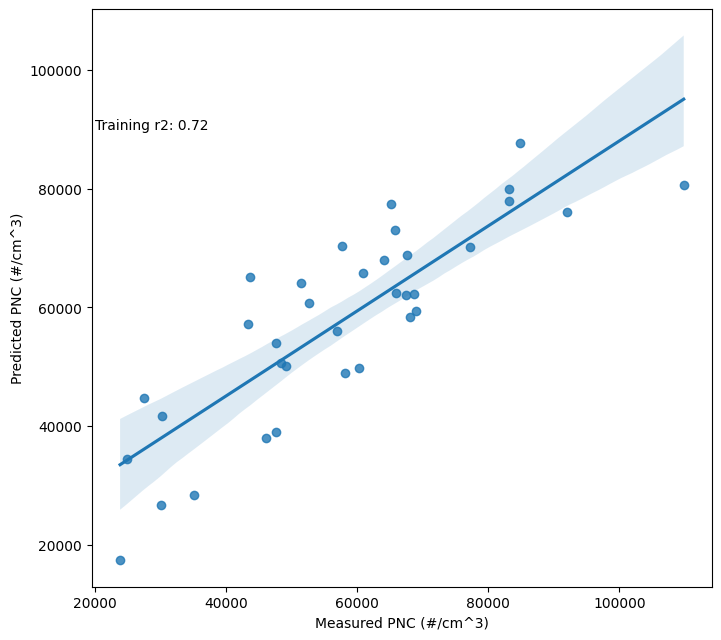

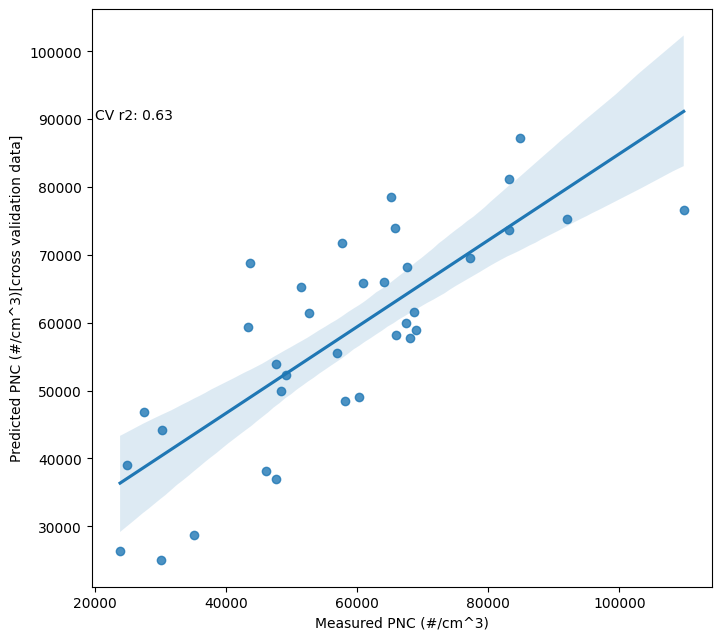

In [ ]:
lst1 = ['gsv_grass_p100',
  'gsv_plant_p250',
  'gsv_poster_p250',
  'RdAll_150',
  'rest_s250']
df_relevant = X_st[lst1]
x_pred_relevant = x_pred_st[lst1]

# For each feature, find the minimum and maximum values in the Df dataset
feature_min = df_relevant.min()
feature_max = df_relevant.max()
print(feature_min)
print(feature_max)

# Initialize a list to store the indices of rows to keep
rows_to_keep = []

# Iterate over each row in the X_Pred dataset
for i, row in x_pred_relevant.iterrows():
    # Initialize a flag to check if this row should be kept
    keep_row = True

    # Iterate over each feature in the row
    for feature in lst1:
        # Check if the value for this feature falls outside the range of values in the Df dataset
        if row[feature] < feature_min[feature] or row[feature] > feature_max[feature]:
            # If it does, mark this row as one to skip
            keep_row = False
            break

    # If the row passed the checks, append its index to the list of rows to keep
    if keep_row:
        rows_to_keep.append(i)

# Use the list of indices to select only the rows that should be kept
x_pred_filtered = x_pred_relevant.loc[rows_to_keep]



model = LinearRegression()

X_train= X_st[lst1]

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)
scores = r2_score(y, predicted)
rmse = np.sqrt(mean_squared_error(y,predicted))
nrmse = rmse / (np.max(y) - np.min(y))
rmse_t = np.sqrt(mean_squared_error(y,pred_train))
nrmse_t = rmse_t / (np.max(y) - np.min(y))
print("training r2 score:",r2_per)
print("training RMSE:", rmse_t)
print("training nRMSE:", nrmse_t)

print("cross validation r2 score:",scores)
print("cross validation RMSE:", rmse)
print("cross validation nRMSE:", nrmse)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

txt1 = "Training r2: " + str(round(r2_per,2))
txt2 = "CV r2: " + str(round(scores,2))

fig1 = plt.figure(figsize=(8, 7.5))
sns.regplot(x=y, y=pred_train)
plt.xlabel("Measured PNC (#/cm^3)")
plt.ylabel("Predicted PNC (#/cm^3)")
plt.text(20000, 90000,  txt1)
plt.savefig('/content/lr_train.png')

fig2 = plt.figure(figsize=(8, 7.5))
sns.regplot(x=y, y=predicted)
plt.xlabel("Measured PNC (#/cm^3)")
plt.ylabel("Predicted PNC (#/cm^3)[cross validation data]")
plt.text(20000, 90000,  txt2)
plt.savefig('/content/lr_CV.png')


x_pred_new = x_pred_filtered
pred_train=model.predict(x_pred_new)
pred = pd.DataFrame(index=x_pred_new.index)
pred['prediction'] = pred_train
pred['Latitude'] = X_Pred.loc[pred.index, 'Latitude'].values
pred['Longitude'] = X_Pred.loc[pred.index, 'Longitude'].values
pred.to_csv('/content/Linear_c.csv')

min_prediction_index = pred['prediction'].idxmin()
min_prediction_row = pred.loc[min_prediction_index]

print("Minimum prediction value:", min_prediction_row['prediction'])
print("Corresponding row:", min_prediction_row)

max_prediction_index = pred['prediction'].idxmax()
max_prediction_row = pred.loc[max_prediction_index]

print("Minimum prediction value:", max_prediction_row['prediction'])
print("Corresponding row:", max_prediction_row)

num_negatives = (pred['prediction'] <0).sum()

print(num_negatives)

perm = PermutationImportance(model).fit(X_train, y)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 320.629s
r2 score for train data in LR: 0.30921018189919813
cross validation r2 score:
0.18563168999135093
r2 score for train data in LR: 0.434125738740638
cross validation r2 score:
0.3098080094029193
r2 score for train data in LR: 0.4506031432555442
cross validation r2 score:
0.3281277816838948
r2 score for train data in LR: 0.5024381769557266
cross validation r2 score:
0.40052511291975723
r2 score for train data in LR: 0.5297822442061428
cross validation r2 score:
0.440147139392172
r2 score for train data in LR: 0.545242125220808
cross validation r2 score:
0.44240348892759507
r2 score for train data in LR: 0.567366318277837
cross validation r2 score:
0.4482650923051362
r2 score for train data in LR: 0.5775186979828693
cross validation r2 score:
0.4659802602147227
r2 score for train data i

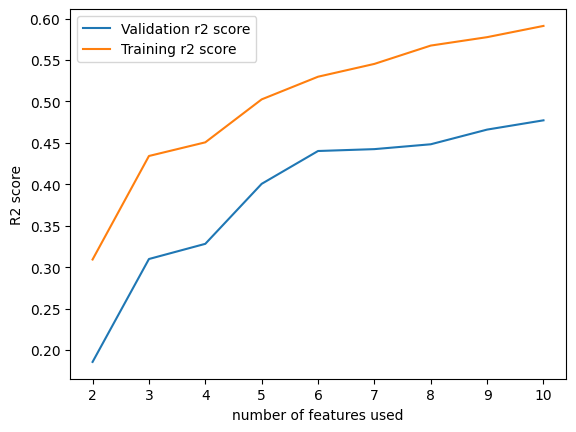

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]
  LR = LinearRegression().fit(X_st, y)
  importance = np.abs(LR.coef_)
  feature_names = np.array(X_st.columns)
  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  sfs_forward = SequentialFeatureSelector(
  LR, n_features_to_select=x, direction="forward",cv=10 ).fit(X_st, y)
  print(f"selected features: {x}")
  # tic_bwd = time()
  # sfs_backward = SequentialFeatureSelector(
  #     LR, n_features_to_select=3, direction="backward"
  # ).fit(X, y)
  # toc_bwd = time()


  for i in feature_names[sfs_forward.get_support()]:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=LinearRegression()
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')

  predicted= cross_val_predict(model, X_Train, y, cv=10)

  scores = r2_score(y, predicted)


  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error')
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['gsv_fence_p250', 'RdL4_100'],
 ['gsv_fence_p250', 'gsv_plant_p500', 'RdL4_100'],
 ['gsv_awning_p250', 'gsv_fence_p250', 'gsv_plant_p500', 'RdL4_100'],
 ['gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_bicycle_p250',
  'gsv_plant_p500',
  'RdL4_100'],
 ['gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_bicycle_p250',
  'gsv_plant_p500',
  'gsv_sidewalk_p500',
  'RdL4_100'],
 ['gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_bicycle_p250',
  'gsv_plant_p500',
  'gsv_streetligh_p500',
  'gsv_sidewalk_p500',
  'RdL4_100'],
 ['gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_bicycle_p250',
  'gsv_plant_p500',
  'gsv_streetligh_p500',
  'gsv_sidewalk_p500',
  'RdL1_100',
  'RdL4_100'],
 ['gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_bicycle_p250',
  'gsv_plant_p500',
  'gsv_streetligh_p500',
  'gsv_sidewalk_p500',
  'gsv_truck_p750',
  'RdL1_100',
  'RdL4_100'],
 ['gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_bicycle_p250',
  'gsv_plant_p500',
  'gsv_streetligh_p500',
  'gsv_sidewalk_p500',
  'gsv_tru

# **Ridge**

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 36.496s
r2 score for train data in LR: 0.49348547339245674
cross validation r2 score:
0.22638899998648088
r2 score for train data in LR: 0.5137673236266028
cross validation r2 score:
0.26382837361036093
r2 score for train data in LR: 0.6607427464510444
cross validation r2 score:
0.5101197041420666
r2 score for train data in LR: 0.7460735781336755
cross validation r2 score:
0.64512509907319
r2 score for train data in LR: 0.7895658966738337
cross validation r2 score:
0.680845095603773
r2 score for train data in LR: 0.821187444245396
cross validation r2 score:
0.7271602310773135
r2 score for train data in LR: 0.8485306635488181
cross validation r2 score:
0.7692066654693379
r2 score for train data in LR: 0.8577293495124967
cross validation r2 score:
0.7730849694388984
r2 score for train data in 

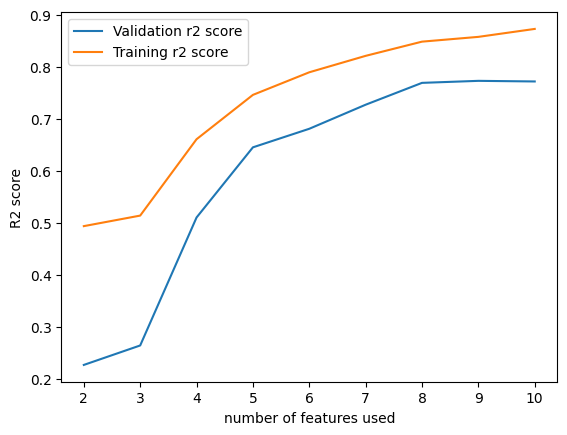

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]
  LR = RidgeCV(alphas=np.logspace(0, 10, num=10)).fit(X_st, y)
  feature_names = np.array(X_st.columns)

  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  selector = RFE(LR, n_features_to_select=x)
  selector.fit(X_st, y)
  print(f"selected features: {x}")
  selected_features = X_st.columns[selector.support_]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=LR
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')

  predicted= cross_val_predict(model, X_Train, y, cv=10)

  scores = r2_score(y, predicted)


  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error')
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['gsv_house_p750', 'RdclS_250'],
 ['gsv_house_p750', 'RdclT_150', 'RdclS_250'],
 ['gsv_plant_p250', 'gsv_house_p750', 'RdclT_150', 'RdclS_250'],
 ['gsv_plant_p250', 'gsv_house_p750', 'RdAll_250', 'RdclT_150', 'RdclS_250'],
 ['gsv_plant_p250',
  'gsv_house_p750',
  'RdAll_250',
  'RdclT_150',
  'RdclS_250',
  'RdL3_1000'],
 ['gsv_plant_p250',
  'gsv_field_p500',
  'gsv_house_p750',
  'RdAll_250',
  'RdclT_150',
  'RdclS_250',
  'RdL3_1000'],
 ['gsv_building_p100',
  'gsv_plant_p250',
  'gsv_field_p500',
  'gsv_house_p750',
  'RdAll_250',
  'RdclT_150',
  'RdclS_250',
  'RdL3_1000'],
 ['gsv_building_p100',
  'gsv_plant_p250',
  'gsv_field_p500',
  'gsv_house_p750',
  'gsv_signboard_p1500',
  'RdAll_250',
  'RdclT_150',
  'RdclS_250',
  'RdL3_1000'],
 ['gsv_building_p100',
  'gsv_plant_p250',
  'gsv_field_p500',
  'gsv_house_p750',
  'gsv_signboard_p1500',
  'gsv_poster_p1500',
  'RdAll_250',
  'RdclT_150',
  'RdclS_250',
  'RdL3_1000']]

In [ ]:

lst1=['gsv_plant_p250', 'gsv_house_p750', 'RdAll_250', 'RdclT_150', 'RdclS_250']

model= RidgeCV(alphas=np.logspace(0, 10, num=10))

X_train= X_st[lst1]

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

r2 score for train data in LR: 0.7460735781336755
cross validation r2 score: 0.64512509907319


actual      predicted
site_name                                 
Aftabnagar            60300   57216.419753
Agashadek_road        60800   69386.302643
Airport               56900   47650.370055
Azimpur               48400   44958.826861
Baridhara             46000   43445.537982
BUET                  24900   40027.572449
Chandrima_park        23800   44638.695156
Dhanmondi_lake_park   30200   41864.412055
Elephant_road         69000   57721.783816
Eskaton               67600   62072.834302
Farmgate              77200   73260.065155
Gulisthan             84800   87189.939363
Hatirjhil             43600   56892.774456
Jamuna_future_park    64000   58445.898622
Khilgaon              51400   46668.886960
Lalbag                58100   57355.786019
Mirpur_1              68600   70158.579247
Mirpur_DOHS           47600   53360.381123
Mirpur_Milk Vita      83200   62788.228685
Mohakhali             65100   65640.406197
Mohammadpur           47600   57852.823989
Mouchak              109800   82402.264292
New_market            67500   59145.623573
Niketan_park          30000   35186.755876
Rampura               83100   63127.614119
Romna_park            57700   56452.941735
Shangsad_bhaban       68000   45851.721223
Shimanto_square       49100   70360.682964
Square_hospital       52600   44865.037690
Technical             92000  107912.007892
Tejgaon               43300   54461.437183
TSC_DU                65900   69395.388252
US_Embassy            65700   65140.515452
Uttara_Sector1        35100   30415.400362
Uttara_Sector7        27500   36469.733521

gsv_plant_p250   -1.031502
gsv_house_p750   -0.735631
RdAll_250        -1.263310
RdclT_150        -0.664168
RdclS_250        -0.647352
dtype: float64
gsv_plant_p250    2.978259
gsv_house_p750    4.573802
RdAll_250         3.680402
RdclT_150         3.436871
RdclS_250         4.056816
dtype: float64
training r2 score: 0.7460735781336755
training RMSE: 9798.532884780878
training nRMSE: 0.11393642889280091
cross validation r2 score: 0.64512509907319
cross validation RMSE: 11583.631951100317
cross validation nRMSE: 0.13469339478023623
Minimum prediction value: 16278.839916073157
Corresponding row: prediction    16278.839916
Latitude         23.798401
Longitude        90.403687
Name: 6862, dtype: float64
Minimum prediction value: 129788.88977942408
Corresponding row: prediction    129788.889779
Latitude          23.711792
Longitude         90.430695
Name: 2461, dtype: float64
0


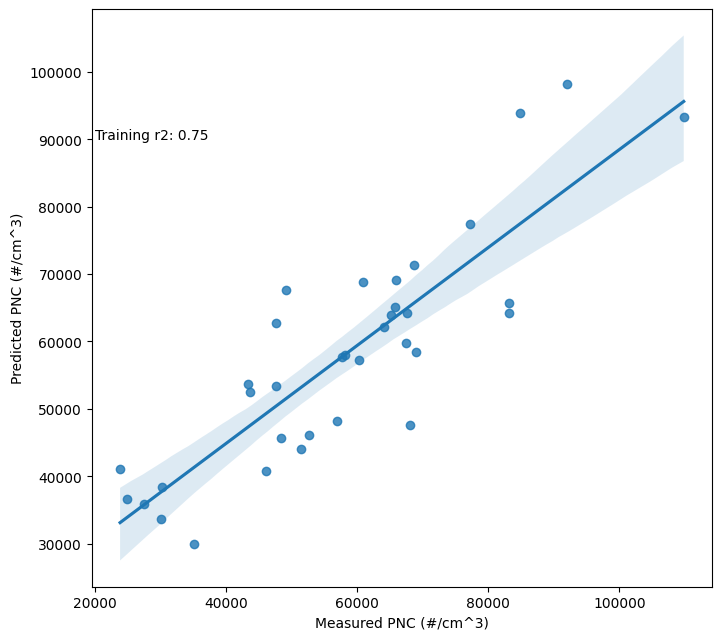

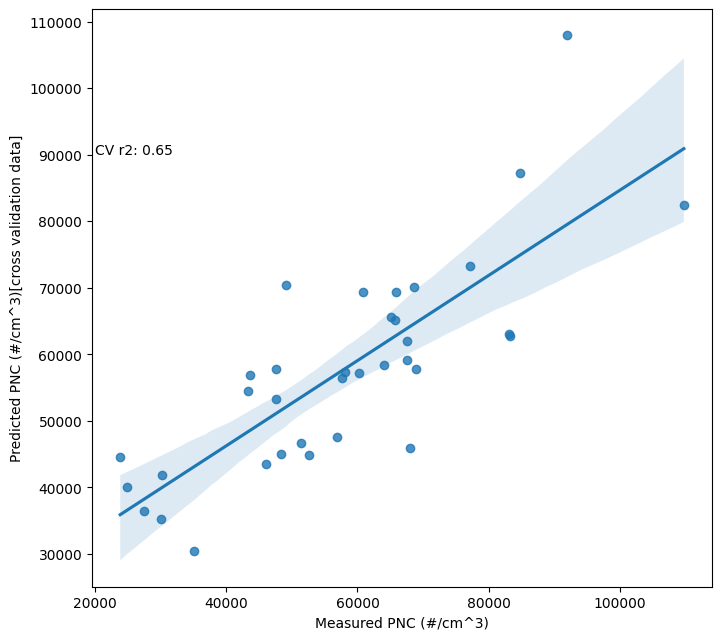

In [ ]:
lst1 = ['gsv_plant_p250', 'gsv_house_p750', 'RdAll_250', 'RdclT_150', 'RdclS_250']
df_relevant = X_st[lst1]
x_pred_relevant = x_pred_st[lst1]

# For each feature, find the minimum and maximum values in the Df dataset
feature_min = df_relevant.min()
feature_max = df_relevant.max()
print(feature_min)
print(feature_max)

# Initialize a list to store the indices of rows to keep
rows_to_keep = []

# Iterate over each row in the X_Pred dataset
for i, row in x_pred_relevant.iterrows():
    # Initialize a flag to check if this row should be kept
    keep_row = True

    # Iterate over each feature in the row
    for feature in lst1:
        # Check if the value for this feature falls outside the range of values in the Df dataset
        if row[feature] < feature_min[feature] or row[feature] > feature_max[feature]:
            # If it does, mark this row as one to skip
            keep_row = False
            break

    # If the row passed the checks, append its index to the list of rows to keep
    if keep_row:
        rows_to_keep.append(i)

# Use the list of indices to select only the rows that should be kept
x_pred_filtered = x_pred_relevant.loc[rows_to_keep]



model = RidgeCV(alphas=np.logspace(0, 10, num=10))

X_train= X_st[lst1]

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)
scores = r2_score(y, predicted)
rmse = np.sqrt(mean_squared_error(y,predicted))
nrmse = rmse / (np.max(y) - np.min(y))
rmse_t = np.sqrt(mean_squared_error(y,pred_train))
nrmse_t = rmse_t / (np.max(y) - np.min(y))
print("training r2 score:",r2_per)
print("training RMSE:", rmse_t)
print("training nRMSE:", nrmse_t)

print("cross validation r2 score:",scores)
print("cross validation RMSE:", rmse)
print("cross validation nRMSE:", nrmse)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

txt1 = "Training r2: " + str(round(r2_per,2))
txt2 = "CV r2: " + str(round(scores,2))

fig1 = plt.figure(figsize=(8, 7.5))
sns.regplot(x=y, y=pred_train)
plt.xlabel("Measured PNC (#/cm^3)")
plt.ylabel("Predicted PNC (#/cm^3)")
plt.text(20000, 90000,  txt1)
plt.savefig('/content/rd_train.png')

fig2 = plt.figure(figsize=(8, 7.5))
sns.regplot(x=y, y=predicted)
plt.xlabel("Measured PNC (#/cm^3)")
plt.ylabel("Predicted PNC (#/cm^3)[cross validation data]")
plt.text(20000, 90000,  txt2)
plt.savefig('/content/rd_CV.png')


x_pred_new = x_pred_filtered
pred_train=model.predict(x_pred_new)
pred = pd.DataFrame(index=x_pred_new.index)
pred['prediction'] = pred_train
pred['Latitude'] = X_Pred.loc[pred.index, 'Latitude'].values
pred['Longitude'] = X_Pred.loc[pred.index, 'Longitude'].values
pred.to_csv('/content/Ridge_c.csv')

min_prediction_index = pred['prediction'].idxmin()
min_prediction_row = pred.loc[min_prediction_index]

print("Minimum prediction value:", min_prediction_row['prediction'])
print("Corresponding row:", min_prediction_row)

max_prediction_index = pred['prediction'].idxmax()
max_prediction_row = pred.loc[max_prediction_index]

print("Minimum prediction value:", max_prediction_row['prediction'])
print("Corresponding row:", max_prediction_row)

num_negatives = (pred['prediction'] <0).sum()

print(num_negatives)

perm = PermutationImportance(model).fit(X_train, y)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 360.863s
r2 score for train data in LR: 0.3349512091606739
cross validation r2 score:
0.266225433693024
r2 score for train data in LR: 0.43391336177180584
cross validation r2 score:
0.33707854532004744
r2 score for train data in LR: 0.4503724273368994
cross validation r2 score:
0.35725238024739736
r2 score for train data in LR: 0.5632186267926567
cross validation r2 score:
0.48035531478724514
r2 score for train data in LR: 0.589072698726278
cross validation r2 score:
0.5170668714888924
r2 score for train data in LR: 0.6079138450401163
cross validation r2 score:
0.5230595885047211
r2 score for train data in LR: 0.6409845472840523
cross validation r2 score:
0.5495041630722577
r2 score for train data in LR: 0.6512422161729197
cross validation r2 score:
0.5508180815542321
r2 score for train data

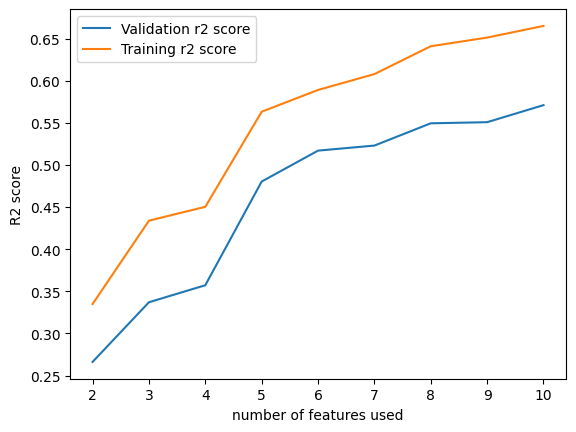

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]
  LR = RidgeCV(alphas=np.logspace(0, 10, num=10)).fit(X_st, y)
  importance = np.abs(LR.coef_)
  feature_names = np.array(X_st.columns)
  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  sfs_forward = SequentialFeatureSelector(
  LR, n_features_to_select=x, direction="forward",cv=10 ).fit(X_st, y)
  print(f"selected features: {x}")
  # tic_bwd = time()
  # sfs_backward = SequentialFeatureSelector(
  #     LR, n_features_to_select=3, direction="backward"
  # ).fit(X, y)
  # toc_bwd = time()


  for i in feature_names[sfs_forward.get_support()]:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=LR
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')

  predicted= cross_val_predict(model, X_Train, y, cv=10)

  scores = r2_score(y, predicted)


  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error')
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['gsv_plant_p500', 'RdL4_100'],
 ['gsv_fence_p250', 'gsv_plant_p500', 'RdL4_100'],
 ['gsv_awning_p250', 'gsv_fence_p250', 'gsv_plant_p500', 'RdL4_100'],
 ['gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_plant_p500',
  'gsv_bicycle_p500',
  'RdL4_100'],
 ['gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_plant_p500',
  'gsv_bicycle_p500',
  'RdL4_100',
  'rest_s250'],
 ['gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_plant_p500',
  'gsv_bicycle_p500',
  'gsv_minibike_p1250',
  'RdL4_100',
  'rest_s250'],
 ['gsv_person_p100',
  'gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_plant_p500',
  'gsv_bicycle_p500',
  'gsv_minibike_p1250',
  'RdL4_100',
  'rest_s250'],
 ['gsv_person_p100',
  'gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_plant_p500',
  'gsv_streetligh_p500',
  'gsv_bicycle_p500',
  'gsv_minibike_p1250',
  'RdL4_100',
  'rest_s250'],
 ['gsv_person_p100',
  'gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_plant_p500',
  'gsv_streetligh_p500',
  'gsv_bicycle_p500',
  'gsv_car_p1000',
  'gsv_mi

# **Lasso**

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 25.093s
r2 score for train data in LR: 0.384000242543712
cross validation r2 score:
0.2517156958988449
r2 score for train data in LR: 0.43515168400823967
cross validation r2 score:
0.2472658932138706
r2 score for train data in LR: 0.5052897853714318
cross validation r2 score:
0.30339324462015915
r2 score for train data in LR: 0.5425381379277846
cross validation r2 score:
0.35492359757994196
r2 score for train data in LR: 0.6086265201109533
cross validation r2 score:
0.31649362491276367
r2 score for train data in LR: 0.7030529928421083
cross validation r2 score:
-0.4415740099265755
r2 score for train data in LR: 0.7810238006759438
cross validation r2 score:
0.37225333118465886
r2 score for train data in LR: 0.8112593160376533
cross validation r2 score:
0.5910198208208085
r2 score for train da

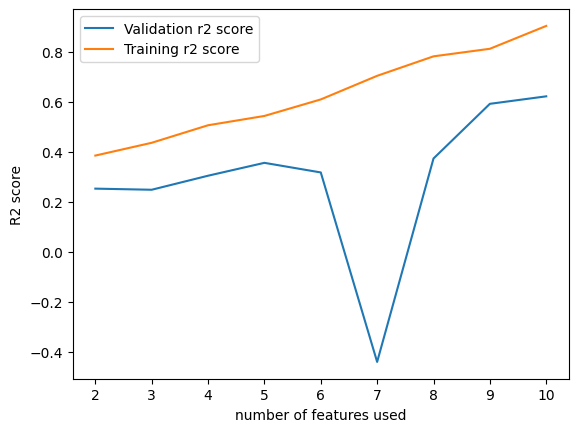

[['gsv_grass_p100', 'gsv_pole_p100'],
 ['gsv_grass_p100', 'gsv_pole_p100', 'gsv_house_p150'],
 ['gsv_water_p100', 'gsv_grass_p100', 'gsv_pole_p100', 'gsv_house_p150'],
 ['gsv_water_p100',
  'gsv_grass_p100',
  'gsv_pole_p100',
  'gsv_house_p150',
  'gsv_sidewalk_p750'],
 ['gsv_water_p100',
  'gsv_grass_p100',
  'gsv_pole_p100',
  'gsv_house_p150',
  'gsv_sidewalk_p750',
  'rest_s2000'],
 ['gsv_water_p100',
  'gsv_grass_p100',
  'gsv_pole_p100',
  'gsv_house_p150',
  'gsv_minibike_p500',
  'gsv_sidewalk_p750',
  'rest_s2000'],
 ['gsv_water_p100',
  'gsv_grass_p100',
  'gsv_pole_p100',
  'gsv_house_p150',
  'gsv_poster_p250',
  'gsv_minibike_p500',
  'gsv_sidewalk_p750',
  'rest_s2000'],
 ['gsv_water_p100',
  'gsv_grass_p100',
  'gsv_pole_p100',
  'gsv_house_p150',
  'gsv_grass_p250',
  'gsv_poster_p250',
  'gsv_minibike_p500',
  'gsv_sidewalk_p750',
  'rest_s2000'],
 ['gsv_water_p100',
  'gsv_grass_p100',
  'gsv_pole_p100',
  'gsv_poster_p100',
  'gsv_house_p150',
  'gsv_grass_p250',
  

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]
  LR = Lasso(max_iter=100000, alpha=.02)
  feature_names = np.array(X_st.columns)

  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  selector = RFE(LR, n_features_to_select=x)
  selector.fit(X_st, y)
  print(f"selected features: {x}")
  selected_features = X_st.columns[selector.support_]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=LR
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')

  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)

  scores = r2_score(y, predicted)


  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error')
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()
lst2

gsv_grass_p100   -0.382661
gsv_fence_p250   -1.439178
gsv_house_p500   -0.533477
gsv_road_p500    -1.973119
RdL4_100         -0.321104
dtype: float64
gsv_grass_p100    5.440127
gsv_fence_p250    2.878325
gsv_house_p500    5.669950
gsv_road_p500     2.887058
RdL4_100          4.281993
dtype: float64
training r2 score: 0.6165179587083089
training RMSE: 19154.94986834692
training nRMSE: 0.15823293226809113
cross validation r2 score: 0.5003742547338801
cross validation RMSE: 21864.064959640273
cross validation nRMSE: 0.18061206808903385
Minimum prediction value: -8773.693957048577
Corresponding row: prediction   -8773.693957
Latitude        23.756897
Longitude       90.342407
Name: 4712, dtype: float64
Minimum prediction value: 155295.10435214784
Corresponding row: prediction    155295.104352
Latitude          23.847015
Longitude         90.410889
Name: 9350, dtype: float64
2


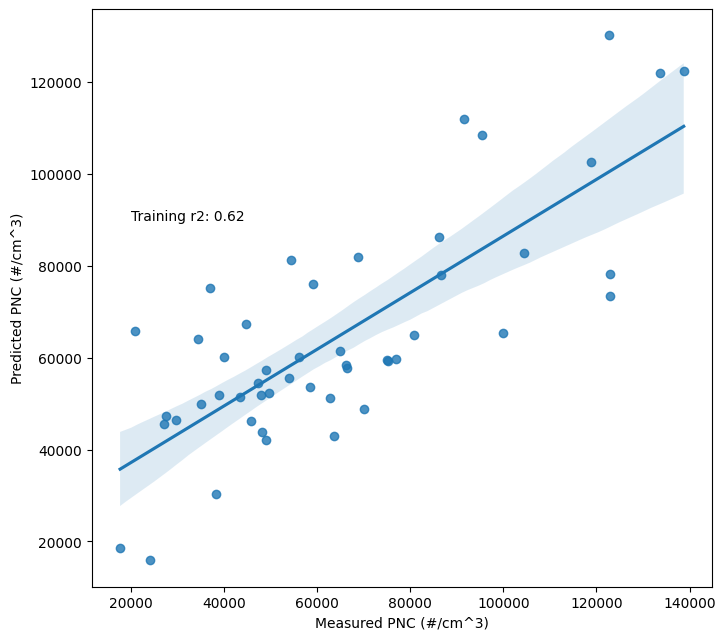

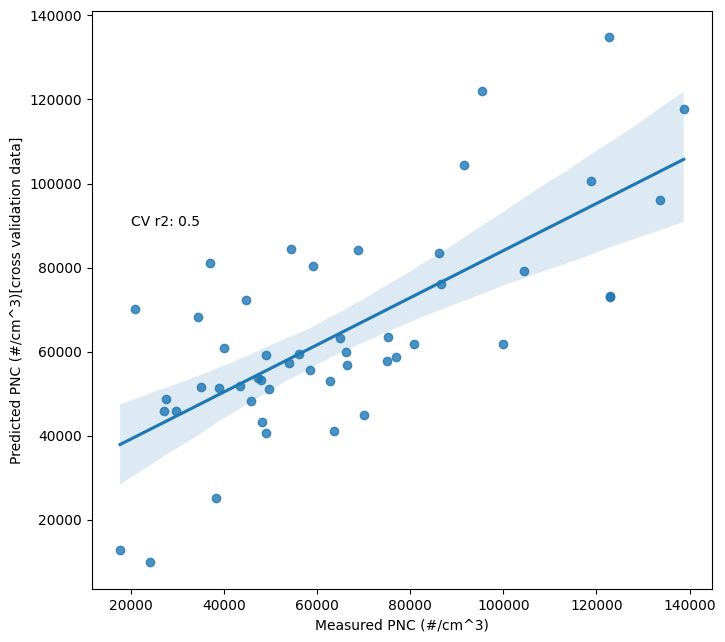

In [ ]:
lst1 = ['gsv_grass_p100',
  'gsv_fence_p250',
  'gsv_house_p500',
  'gsv_road_p500',
  'RdL4_100']
df_relevant = X_st[lst1]
x_pred_relevant = x_pred_st[lst1]

# For each feature, find the minimum and maximum values in the Df dataset
feature_min = df_relevant.min()
feature_max = df_relevant.max()
print(feature_min)
print(feature_max)

# Initialize a list to store the indices of rows to keep
rows_to_keep = []

# Iterate over each row in the X_Pred dataset
for i, row in x_pred_relevant.iterrows():
    # Initialize a flag to check if this row should be kept
    keep_row = True

    # Iterate over each feature in the row
    for feature in lst1:
        # Check if the value for this feature falls outside the range of values in the Df dataset
        if row[feature] < feature_min[feature] or row[feature] > feature_max[feature]:
            # If it does, mark this row as one to skip
            keep_row = False
            break

    # If the row passed the checks, append its index to the list of rows to keep
    if keep_row:
        rows_to_keep.append(i)

# Use the list of indices to select only the rows that should be kept
x_pred_filtered = x_pred_relevant.loc[rows_to_keep]



model = Lasso(max_iter=100000, alpha=.2)

X_train= X_st[lst1]

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)
scores = r2_score(y, predicted)
rmse = np.sqrt(mean_squared_error(y,predicted))
nrmse = rmse / (np.max(y) - np.min(y))
rmse_t = np.sqrt(mean_squared_error(y,pred_train))
nrmse_t = rmse_t / (np.max(y) - np.min(y))
print("training r2 score:",r2_per)
print("training RMSE:", rmse_t)
print("training nRMSE:", nrmse_t)

print("cross validation r2 score:",scores)
print("cross validation RMSE:", rmse)
print("cross validation nRMSE:", nrmse)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

txt1 = "Training r2: " + str(round(r2_per,2))
txt2 = "CV r2: " + str(round(scores,2))

fig1 = plt.figure(figsize=(8, 7.5))
sns.regplot(x=y, y=pred_train)
plt.xlabel("Measured PNC (#/cm^3)")
plt.ylabel("Predicted PNC (#/cm^3)")
plt.text(20000, 90000,  txt1)
plt.savefig('/content/lasso_train.png')

fig2 = plt.figure(figsize=(8, 7.5))
sns.regplot(x=y, y=predicted)
plt.xlabel("Measured PNC (#/cm^3)")
plt.ylabel("Predicted PNC (#/cm^3)[cross validation data]")
plt.text(20000, 90000,  txt2)
plt.savefig('/content/lasso_CV.png')


x_pred_new = x_pred_filtered
pred_train=model.predict(x_pred_new)
pred = pd.DataFrame(index=x_pred_new.index)
pred['prediction'] = pred_train
pred['Latitude'] = X_Pred.loc[pred.index, 'Latitude'].values
pred['Longitude'] = X_Pred.loc[pred.index, 'Longitude'].values
pred.to_csv('/content/Lasso_c.csv')

min_prediction_index = pred['prediction'].idxmin()
min_prediction_row = pred.loc[min_prediction_index]

print("Minimum prediction value:", min_prediction_row['prediction'])
print("Corresponding row:", min_prediction_row)

max_prediction_index = pred['prediction'].idxmax()
max_prediction_row = pred.loc[max_prediction_index]

print("Minimum prediction value:", max_prediction_row['prediction'])
print("Corresponding row:", max_prediction_row)

num_negatives = (pred['prediction'] <0).sum()

print(num_negatives)

perm = PermutationImportance(model).fit(X_train, y)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

In [ ]:
lst2

[['gsv_house_p500', 'RdL4_100'],
 ['gsv_fence_p250', 'gsv_house_p500', 'RdL4_100'],
 ['gsv_fence_p250', 'gsv_house_p500', 'gsv_road_p500', 'RdL4_100'],
 ['gsv_grass_p100',
  'gsv_fence_p250',
  'gsv_house_p500',
  'gsv_road_p500',
  'RdL4_100'],
 ['gsv_grass_p100',
  'gsv_fence_p250',
  'gsv_house_p500',
  'gsv_road_p500',
  'gsv_minibike_p500',
  'RdL4_100'],
 ['gsv_grass_p100',
  'gsv_fence_p250',
  'gsv_house_p500',
  'gsv_road_p500',
  'gsv_minibike_p500',
  'gsv_minibike_p750',
  'RdL4_100'],
 ['gsv_grass_p100',
  'gsv_person_p100',
  'gsv_fence_p250',
  'gsv_house_p500',
  'gsv_road_p500',
  'gsv_minibike_p500',
  'gsv_minibike_p750',
  'RdL4_100'],
 ['gsv_house_p100',
  'gsv_grass_p100',
  'gsv_person_p100',
  'gsv_fence_p250',
  'gsv_house_p500',
  'gsv_road_p500',
  'gsv_minibike_p500',
  'gsv_minibike_p750',
  'RdL4_100'],
 ['gsv_house_p100',
  'gsv_grass_p100',
  'gsv_person_p100',
  'gsv_fence_p250',
  'gsv_house_p500',
  'gsv_road_p500',
  'gsv_minibike_p500',
  'gsv_poste

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 414.725s
r2 score for train data in LR: 0.30921018174179105
cross validation r2 score:
0.18563397951206395
r2 score for train data in LR: 0.43412573849383274
cross validation r2 score:
0.30981047122720284
r2 score for train data in LR: 0.4506031429291999
cross validation r2 score:
0.32813169336096004
r2 score for train data in LR: 0.5024381765252567
cross validation r2 score:
0.40052671612326174
r2 score for train data in LR: 0.5297822437368411
cross validation r2 score:
0.44014642452921215
r2 score for train data in LR: 0.5452421247012537
cross validation r2 score:
0.44240278541801514
r2 score for train data in LR: 0.5673663177420125
cross validation r2 score:
0.4482752750946788
r2 score for train data in LR: 0.5775186973225028
cross validation r2 score:
0.4659778682441418
r2 score for trai

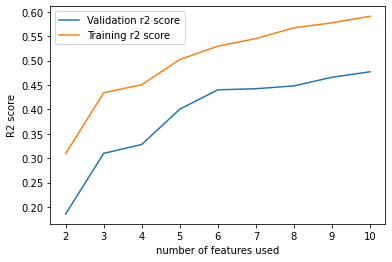

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]
  LR = Lasso(max_iter=100000, alpha=0.2).fit(X_st, y)
  importance = np.abs(LR.coef_)
  feature_names = np.array(X_st.columns)
  #cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
  sfs_forward = SequentialFeatureSelector(
  LR, n_features_to_select=x, direction="forward",cv=10 ).fit(X_st, y)
  print(f"selected features: {x}")
  # tic_bwd = time()
  # sfs_backward = SequentialFeatureSelector(
  #     LR, n_features_to_select=3, direction="backward"
  # ).fit(X, y)
  # toc_bwd = time()


  for i in feature_names[sfs_forward.get_support()]:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()
print(f"Done in {toc_fwd - tic_fwd:.3f}s")
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=LR
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')

  predicted= cross_val_predict(model, X_Train, y, cv=10)

  scores = r2_score(y, predicted)


  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error')
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['gsv_fence_p250', 'RdL4_100'],
 ['gsv_fence_p250', 'gsv_plant_p500', 'RdL4_100'],
 ['gsv_awning_p250', 'gsv_fence_p250', 'gsv_plant_p500', 'RdL4_100'],
 ['gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_bicycle_p250',
  'gsv_plant_p500',
  'RdL4_100'],
 ['gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_bicycle_p250',
  'gsv_plant_p500',
  'gsv_sidewalk_p500',
  'RdL4_100'],
 ['gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_bicycle_p250',
  'gsv_plant_p500',
  'gsv_streetligh_p500',
  'gsv_sidewalk_p500',
  'RdL4_100'],
 ['gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_bicycle_p250',
  'gsv_plant_p500',
  'gsv_streetligh_p500',
  'gsv_sidewalk_p500',
  'RdL1_100',
  'RdL4_100'],
 ['gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_bicycle_p250',
  'gsv_plant_p500',
  'gsv_streetligh_p500',
  'gsv_sidewalk_p500',
  'gsv_truck_p750',
  'RdL1_100',
  'RdL4_100'],
 ['gsv_awning_p250',
  'gsv_fence_p250',
  'gsv_bicycle_p250',
  'gsv_plant_p500',
  'gsv_streetligh_p500',
  'gsv_sidewalk_p500',
  'gsv_tru

# **SVR**

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]

  feature_names = np.array(X_st.columns)

  estimator = SVR(kernel="linear")

  selector = RFE(estimator, n_features_to_select=x)
  selector.fit(X_st, y)
  print(f"selected features: {x}")
  selected_features = X_st.columns[selector.get_support()]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 4.378s


In [ ]:
lst2

[['RdAll_150', 'RdL3_150'],
 ['gsv_trade_p1000', 'RdAll_150', 'RdL3_150'],
 ['gsv_trade_p1000', 'RdAll_100', 'RdAll_150', 'RdL3_150'],
 ['gsv_trade_p1000', 'RdAll_100', 'RdAll_150', 'RdclT_150', 'RdL3_150'],
 ['gsv_trade_p1000',
  'RdAll_100',
  'RdAll_150',
  'RdclT_150',
  'RdL3_150',
  'RdL3_750'],
 ['gsv_trade_p1000',
  'gsv_trade_p1250',
  'RdAll_100',
  'RdAll_150',
  'RdclT_150',
  'RdL3_150',
  'RdL3_750'],
 ['gsv_trade_p1000',
  'gsv_trade_p1250',
  'RdAll_100',
  'RdAll_150',
  'RdclT_150',
  'RdL3_100',
  'RdL3_150',
  'RdL3_750'],
 ['gsv_signboard_p1000',
  'gsv_trade_p1000',
  'gsv_trade_p1250',
  'RdAll_100',
  'RdAll_150',
  'RdclT_150',
  'RdL3_100',
  'RdL3_150',
  'RdL3_750'],
 ['gsv_signboard_p1000',
  'gsv_trade_p1000',
  'gsv_trade_p1250',
  'RdAll_100',
  'RdAll_150',
  'RdAll_250',
  'RdclT_150',
  'RdL3_100',
  'RdL3_150',
  'RdL3_750']]

r2 score for train data in LR: 0.00020819005977945615
cross validation r2 score:
-0.07917647722376131
r2 score for train data in LR: 0.000218442121427187
cross validation r2 score:
-0.07897324023761354
r2 score for train data in LR: 0.00020509226925735646
cross validation r2 score:
-0.07901007511813174
r2 score for train data in LR: 0.00023191313132475688
cross validation r2 score:
-0.07897048557331954
r2 score for train data in LR: 0.00021549882627669437
cross validation r2 score:
-0.07899114064263424
r2 score for train data in LR: 0.00019327087135023735
cross validation r2 score:
-0.07898726953507595
r2 score for train data in LR: 0.00019671027704737387
cross validation r2 score:
-0.07898295239286934
r2 score for train data in LR: 0.00018152033036733517
cross validation r2 score:
-0.0790084624782077
r2 score for train data in LR: 0.0001784918575598038
cross validation r2 score:
-0.07902572545630493


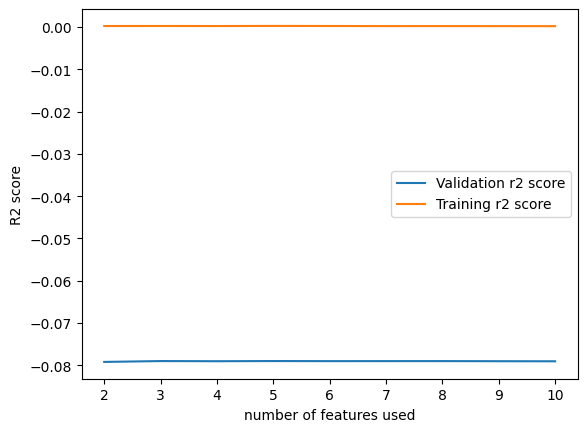

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=SVR()
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')

  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)

  scores = r2_score(y, predicted)


  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error')
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:

most_relevant_features=lst2[3]

X_train=X_st[most_relevant_features]

def objective(trial):
    C = int(trial.suggest_int("C", 1, 100000))
    #kernel = trial.suggest_categorical("kernel", ['rbf','linear'])
    gamma = trial.suggest_float("gamma", 0.001, 10000, log=True)
    # epsilon = trial.suggest_float("epsilon", 0.00000000000000001, .99, log=True)
    # shrinking = trial.suggest_categorical("shrinking", [True,False])
    ## Create Model
    regressor = SVR(C=C,kernel='linear',gamma=gamma)
    regressor.fit(X_train,y)
    pred_train=regressor.predict(X_train)
    r2_per= r2_score(y, pred_train)
    predicted= cross_val_predict(regressor, X_train, y, cv=10)
    r2 = r2_score(y, predicted)
    threshold = 0.1

    # Penalize the objective if the difference between r2 and r2_per is greater than the threshold
    if r2 > .4 and abs(r2_per-r2) < threshold:

      x = r2*10

    else:

      x = r2

    return x

In [ ]:
study = optuna.create_study(study_name="SVR",direction='maximize')
study.optimize(objective, n_trials=1000)

[I 2024-06-08 23:43:03,960] A new study created in memory with name: SVR
[I 2024-06-08 23:43:04,632] Trial 0 finished with value: 0.1427197147104714 and parameters: {'C': 39835, 'gamma': 3.8481595467161522}. Best is trial 0 with value: 0.1427197147104714.
[I 2024-06-08 23:43:04,958] Trial 1 finished with value: 0.1965295344942961 and parameters: {'C': 18569, 'gamma': 5.905051554099436}. Best is trial 1 with value: 0.1965295344942961.
[I 2024-06-08 23:43:05,778] Trial 2 finished with value: 0.10704699480054836 and parameters: {'C': 92871, 'gamma': 12.498684903180939}. Best is trial 1 with value: 0.1965295344942961.
[I 2024-06-08 23:43:06,534] Trial 3 finished with value: 0.10698411257231777 and parameters: {'C': 92976, 'gamma': 0.919752337008841}. Best is trial 1 with value: 0.1965295344942961.
[I 2024-06-08 23:43:07,148] Trial 4 finished with value: 0.13046037500903385 and parameters: {'C': 47275, 'gamma': 437.60745081559054}. Best is trial 1 with value: 0.1965295344942961.
[I 2024-06-

In [ ]:
print("Best Params : {}".format(study.best_params))

print("\nBest r2 : {}".format(study.best_value))

best_trial = study.best_trial
best_params = best_trial.params
model = SVR(C=best_params['C'],
              kernel='linear',
              gamma=best_params['gamma'],
              # epsilon=best_params['epsilon'],
              # shrinking=best_params['shrinking']
            )

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)

Best Params : {'C': 647, 'gamma': 268.0833808519351}

Best r2 : 0.2719984811666609
r2 score for train data in LR: 0.36936952833739245
cross validation r2 score: 0.2719984811666609


In [ ]:
print("Best Params for 6 features : {}".format(study.best_params))

print("\nBest r2 : {}".format(study.best_value))

best_trial = study.best_trial
best_params = best_trial.params

model = SVR(C=best_params['C'],
              kernel='linear',
              gamma=best_params['gamma'])

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)

Best Params for 6 features : {'C': 487, 'gamma': 0.003173013260500399}

Best r2 : 0.0585555086507763
r2 score for train data in LR: 0.13480712431761377
cross validation r2 score: 0.0585555086507763


In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
X_st_n = X_st
for x in range(2,11):
  lst1=[]

  feature_names = np.array(X_st_n.columns)

  estimator = SVR(C=best_params['C'],
              kernel='linear',
              gamma=best_params['gamma'],
              # epsilon=best_params['epsilon'],
              # shrinking=best_params['shrinking']
              )

  selector = RFE(estimator, n_features_to_select=x)
  selector.fit(X_st_n, y)
  print(f"selected features: {x}")
  selected_features = X_st_n.columns[selector.get_support()]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 7.921s


r2 score for train data in LR: 0.508200596551519
cross validation r2 score:
0.4452690604063584
r2 score for train data in LR: 0.6139690247756522
cross validation r2 score:
0.4261411104255143
r2 score for train data in LR: 0.652545120108661
cross validation r2 score:
0.47998802031355614
r2 score for train data in LR: 0.7194699899299578
cross validation r2 score:
0.46317547580425356
r2 score for train data in LR: 0.7476792571553875
cross validation r2 score:
0.5037563722832857
r2 score for train data in LR: 0.767081584808395
cross validation r2 score:
0.6189537102344054
r2 score for train data in LR: 0.7647986169582083
cross validation r2 score:
0.6131265592685613
r2 score for train data in LR: 0.7603079164219051
cross validation r2 score:
0.5679375556435375
r2 score for train data in LR: 0.7690096742557719
cross validation r2 score:
0.6222107223386915


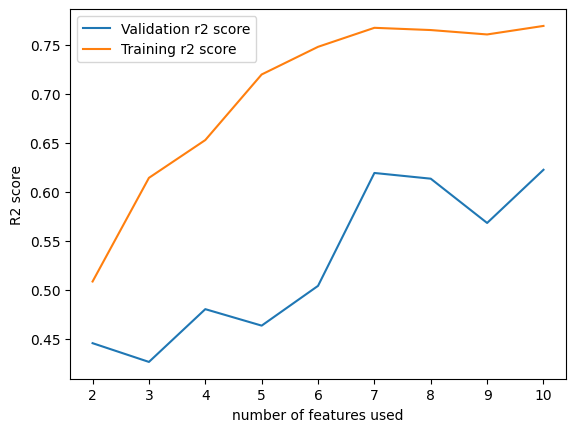

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=SVR(C=best_params['C'],
            kernel='linear',
            gamma=best_params['gamma'],
            # epsilon=best_params['epsilon'],
            # shrinking=best_params['shrinking']
            )
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')

  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)

  scores = r2_score(y, predicted)


  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error')
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['gsv_house_p750', 'RdAll_150'],
 ['gsv_grass_p100', 'gsv_house_p750', 'RdAll_150'],
 ['gsv_grass_p100', 'gsv_fence_p250', 'gsv_house_p750', 'RdAll_150'],
 ['gsv_grass_p100',
  'gsv_house_p250',
  'gsv_fence_p250',
  'gsv_house_p750',
  'RdAll_150'],
 ['gsv_grass_p100',
  'gsv_house_p250',
  'gsv_fence_p250',
  'gsv_house_p750',
  'RdAll_150',
  'RdclS_500'],
 ['gsv_grass_p100',
  'gsv_house_p250',
  'gsv_fence_p250',
  'gsv_house_p750',
  'RdAll_150',
  'RdclS_500',
  'RdL3_1000'],
 ['gsv_grass_p100',
  'gsv_grass_p150',
  'gsv_house_p250',
  'gsv_fence_p250',
  'gsv_house_p750',
  'RdAll_150',
  'RdclS_500',
  'RdL3_1000'],
 ['gsv_grass_p100',
  'gsv_road_p100',
  'gsv_grass_p150',
  'gsv_house_p250',
  'gsv_fence_p250',
  'gsv_house_p750',
  'RdAll_150',
  'RdclS_500',
  'RdL3_1000'],
 ['gsv_grass_p100',
  'gsv_road_p100',
  'gsv_grass_p150',
  'gsv_house_p250',
  'gsv_fence_p250',
  'gsv_house_p750',
  'gsv_minibike_p1000',
  'RdAll_150',
  'RdclS_500',
  'RdL3_1000']]

In [ ]:
most_relevant_features= ['gsv_grass_p100', 'gsv_fence_p250', 'gsv_house_p750', 'RdAll_150']
X_train=X_st[most_relevant_features]

def objective(trial):
    C = int(trial.suggest_int("C", 1, 100000))
    #kernel = trial.suggest_categorical("kernel", ['rbf','linear'])
    gamma = trial.suggest_float("gamma", 0.001, 10000, log=True)
    # epsilon = trial.suggest_float("epsilon", 0.00000000000000001, .99, log=True)
    # shrinking = trial.suggest_categorical("shrinking", [True,False])
    ## Create Model
    regressor = SVR(C=C,kernel='linear',gamma=gamma)
    regressor.fit(X_train,y)
    pred_train=regressor.predict(X_train)
    r2_per= r2_score(y, pred_train)
    predicted= cross_val_predict(regressor, X_train, y, cv=10)
    r2 = r2_score(y, predicted)
    threshold = 0.05

    # Penalize the objective if the difference between r2 and r2_per is greater than the threshold
    if r2 > .6 and abs(r2_per-r2) < threshold:

      x = r2*10

    else:

      x = r2

    return x

study = optuna.create_study(study_name="SVR",direction='maximize')
study.optimize(objective, n_trials=1000)

[I 2024-06-08 23:47:38,764] A new study created in memory with name: SVR
[I 2024-06-08 23:47:38,861] Trial 0 finished with value: 0.4059334631302933 and parameters: {'C': 18673, 'gamma': 0.027317800438115693}. Best is trial 0 with value: 0.4059334631302933.
[I 2024-06-08 23:47:38,974] Trial 1 finished with value: 0.40593307527435674 and parameters: {'C': 19742, 'gamma': 37.20129253289412}. Best is trial 0 with value: 0.4059334631302933.
[I 2024-06-08 23:47:39,124] Trial 2 finished with value: 0.4056833846189688 and parameters: {'C': 91167, 'gamma': 74.94593569079272}. Best is trial 0 with value: 0.4059334631302933.
[I 2024-06-08 23:47:39,234] Trial 3 finished with value: 0.4056829292651043 and parameters: {'C': 62696, 'gamma': 0.003253350595018134}. Best is trial 0 with value: 0.4059334631302933.
[I 2024-06-08 23:47:39,390] Trial 4 finished with value: 0.40568281812892437 and parameters: {'C': 59867, 'gamma': 0.0030373896187397896}. Best is trial 0 with value: 0.4059334631302933.
[I 20

In [ ]:
most_relevant_features= ['gsv_grass_p100', 'gsv_fence_p250', 'gsv_house_p750', 'RdAll_150']
X_train=X_st[most_relevant_features]

print("Best Params : {}".format(study.best_params))

print("\nBest r2 : {}".format(study.best_value))

best_trial = study.best_trial
best_params = best_trial.params
model = SVR(C=best_params['C'],
              kernel='linear',
              gamma=best_params['gamma'],
              # epsilon=best_params['epsilon'],
              # shrinking=best_params['shrinking']
            )

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)

Best Params : {'C': 943, 'gamma': 0.16493224913375393}

Best r2 : 0.4884456841563599
r2 score for train data in LR: 0.655428832920055
cross validation r2 score: 0.4884456841563599


training r2 score: 0.655428832920055
training RMSE: 11414.228830057402
training nRMSE: 0.1327235910471791
cross validation r2 score: 0.4884456841563599
cross validation RMSE: 13907.625400735156
cross validation nRMSE: 0.16171657442715298


actual     predicted
site_name                                
Aftabnagar            60300  54258.095221
Agashadek_road        60800  60787.177803
Airport               56900  45640.412717
Azimpur               48400  45915.546549
Baridhara             46000  45349.098269
BUET                  24900  45937.793013
Chandrima_park        23800  61738.935012
Dhanmondi_lake_park   30200  48683.216161
Elephant_road         69000  59865.385078
Eskaton               67600  56471.956973
Farmgate              77200  74199.785159
Gulisthan             84800  82237.391500
Hatirjhil             43600  62873.847481
Jamuna_future_park    64000  52333.677299
Khilgaon              51400  54003.202680
Lalbag                58100  63751.115025
Mirpur_1              68600  68008.549756
Mirpur_DOHS           47600  47456.137141
Mirpur_Milk Vita      83200  58132.918587
Mohakhali             65100  64401.431989
Mohammadpur           47600  58868.834580
Mouchak              109800  70142.123843
New_market            67500  61556.213710
Niketan_park          30000  39087.536720
Rampura               83100  71479.940784
Romna_park            57700  63211.613678
Shangsad_bhaban       68000  60125.369813
Shimanto_square       49100  55375.629423
Square_hospital       52600  59717.737600
Technical             92000  88528.936232
Tejgaon               43300  43977.531971
TSC_DU                65900  67928.681313
US_Embassy            65700  53121.523684
Uttara_Sector1        35100  40308.909098
Uttara_Sector7        27500  52815.549022

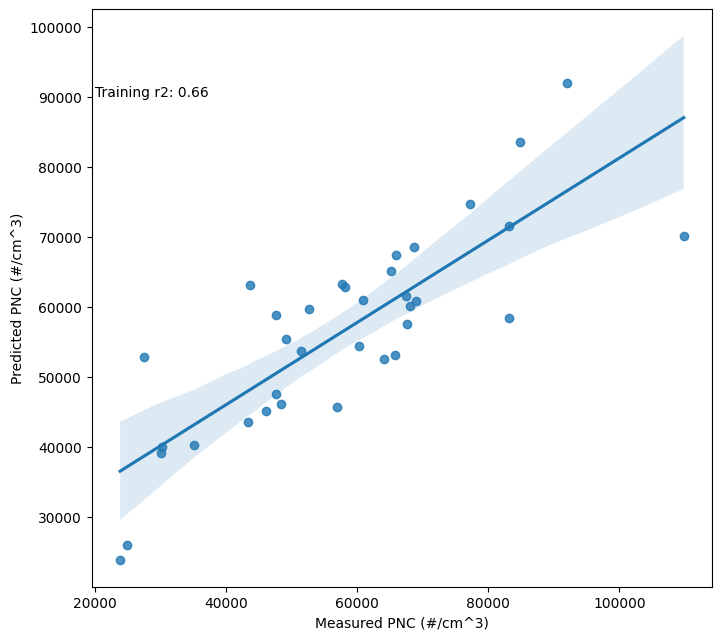

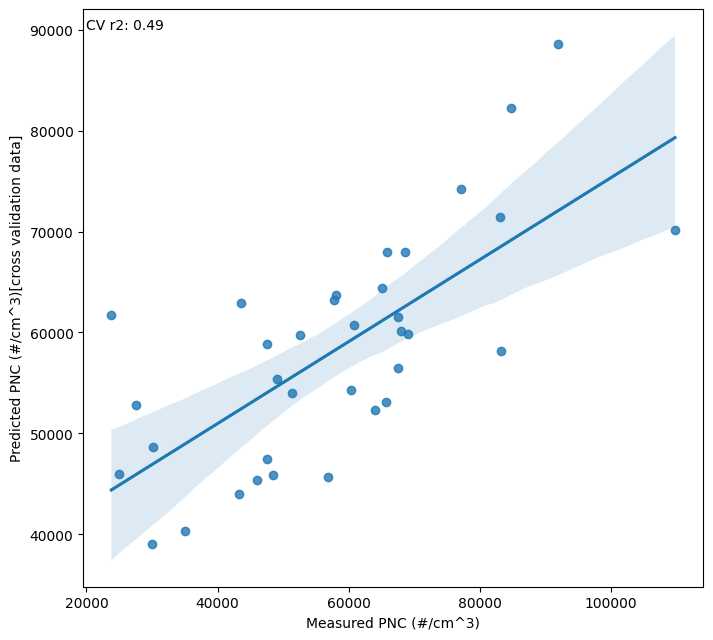

In [ ]:
model = SVR(C=best_params['C'],
              kernel='linear',
              gamma=best_params['gamma'],
              # epsilon=best_params['epsilon'],
              # shrinking=best_params['shrinking']
            )

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)
scores = r2_score(y, predicted)
rmse = np.sqrt(mean_squared_error(y,predicted))
nrmse = rmse / (np.max(y) - np.min(y))
rmse_t = np.sqrt(mean_squared_error(y,pred_train))
nrmse_t = rmse_t / (np.max(y) - np.min(y))
print("training r2 score:",r2_per)
print("training RMSE:", rmse_t)
print("training nRMSE:", nrmse_t)

print("cross validation r2 score:",scores)
print("cross validation RMSE:", rmse)
print("cross validation nRMSE:", nrmse)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

txt1 = "Training r2: " + str(round(r2_per,2))
txt2 = "CV r2: " + str(round(scores,2))

fig1 = plt.figure(figsize=(8, 7.5))
sns.regplot(x=y, y=pred_train)
plt.xlabel("Measured PNC (#/cm^3)")
plt.ylabel("Predicted PNC (#/cm^3)")
plt.text(20000, 90000,  txt1)
plt.savefig('/content/sv_train.png')

fig2 = plt.figure(figsize=(8, 7.5))
sns.regplot(x=y, y=predicted)
plt.xlabel("Measured PNC (#/cm^3)")
plt.ylabel("Predicted PNC (#/cm^3)[cross validation data]")
plt.text(20000, 90000,  txt2)
plt.savefig('/content/sv_CV.png')

new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

In [ ]:
lst1 = most_relevant_features
df_relevant = X_st[lst1]
x_pred_relevant = x_pred_st[lst1]

# For each feature, find the minimum and maximum values in the Df dataset
feature_min = df_relevant.min()
feature_max = df_relevant.max()
print(feature_min)
print(feature_max)

# Initialize a list to store the indices of rows to keep
rows_to_keep = []

# Iterate over each row in the X_Pred dataset
for i, row in x_pred_relevant.iterrows():
    # Initialize a flag to check if this row should be kept
    keep_row = True

    # Iterate over each feature in the row
    for feature in lst1:
        # Check if the value for this feature falls outside the range of values in the Df dataset
        if row[feature] < feature_min[feature] or row[feature] > feature_max[feature]:
            # If it does, mark this row as one to skip
            keep_row = False
            break

    # If the row passed the checks, append its index to the list of rows to keep
    if keep_row:
        rows_to_keep.append(i)

# Use the list of indices to select only the rows that should be kept
x_pred_filtered = x_pred_relevant.loc[rows_to_keep]




model = SVR(C=1589,
              kernel='linear',
              gamma=19.598320189651393,
              # epsilon=best_params['epsilon'],
              # shrinking=best_params['shrinking']
            )
              # epsilon=best_params['epsilon'],
              # shrinking=best_params['shrinking']


X_train= X_st[lst1]

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

txt1 = "Training r2: " + str(round(r2_per,2))
txt2 = "CV r2: " + str(round(scores,2))

fig1 = plt.figure(figsize=(8, 7.5))
sns.regplot(x=y, y=pred_train)
plt.xlabel("Measured PNC (#/cm^3)")
plt.ylabel("Predicted PNC (#/cm^3)[training data]")
plt.text(20000, 90000,  txt1)

fig2 = plt.figure(figsize=(8, 7.5))
sns.regplot(x=y, y=predicted)
plt.xlabel("Measured PNC (#/cm^3)")
plt.ylabel("Predicted PNC (#/cm^3)[cross validation data]")
plt.text(20000, 90000,  txt2)

plt.show()


x_pred_new = x_pred_filtered
pred_train=model.predict(x_pred_new)
pred = pd.DataFrame(index=x_pred_new.index)
pred['prediction'] = pred_train
pred['Latitude'] = X_Pred.loc[pred.index, 'Latitude'].values
pred['Longitude'] = X_Pred.loc[pred.index, 'Longitude'].values
pred.to_csv('/content/SVR_GSV.csv')

min_prediction_index = pred['prediction'].idxmin()
min_prediction_row = pred.loc[min_prediction_index]

print("Minimum prediction value:", min_prediction_row['prediction'])
print("Corresponding row:", min_prediction_row)

max_prediction_index = pred['prediction'].idxmax()
max_prediction_row = pred.loc[max_prediction_index]

print("Minimum prediction value:", max_prediction_row['prediction'])
print("Corresponding row:", max_prediction_row)

num_negatives = (pred['prediction'] <0).sum()

print(num_negatives)

perm = PermutationImportance(model).fit(X_train, y)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

NameError: ignored

X does not have valid feature names, but SVR was fitted with feature names


  0%|          | 0/2369 [00:00<?, ?it/s]

X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid fea

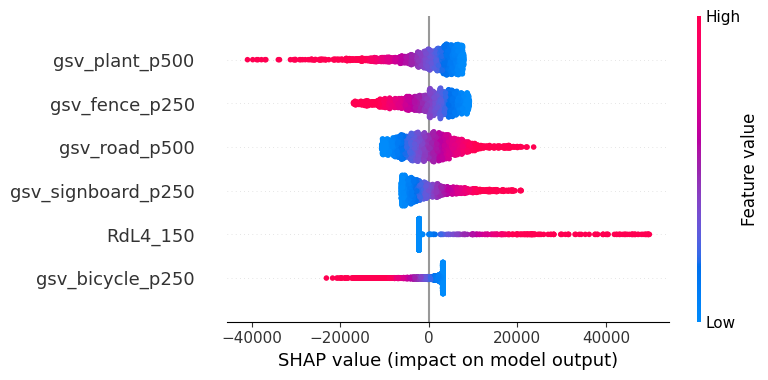

In [ ]:
explainer = shap.KernelExplainer(model.predict, x_pred_new)
shap_values = explainer.shap_values(x_pred_new)
# create SHAP summary plot
shap.summary_plot(shap_values, x_pred_new)


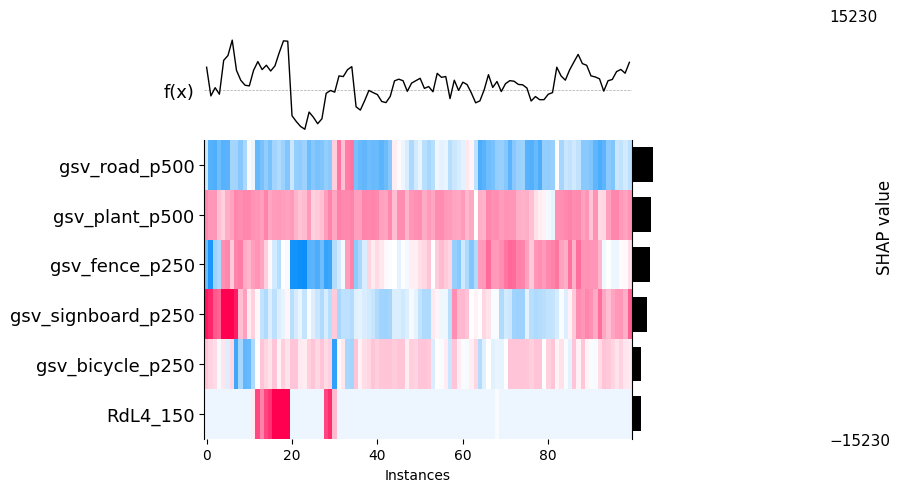

In [ ]:
explainer = shap.Explainer(model, x_pred_new)
shap_values = explainer(x_pred_new)
shap.plots.heatmap(shap_values[:100])

In [ ]:
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_train)
# create SHAP summary plot
clustering = shap.utils.hclust(X_train, y)

explainer_ebm = shap.Explainer(model, X_train)
shap_values_ebm = explainer_ebm(X_train)

X does not have valid feature names, but SVR was fitted with feature names


  0%|          | 0/49 [00:00<?, ?it/s]

X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid feature names, but SVR was fitted with feature names
X does not have valid fea

In [ ]:
print(shap.__version__)

0.41.0


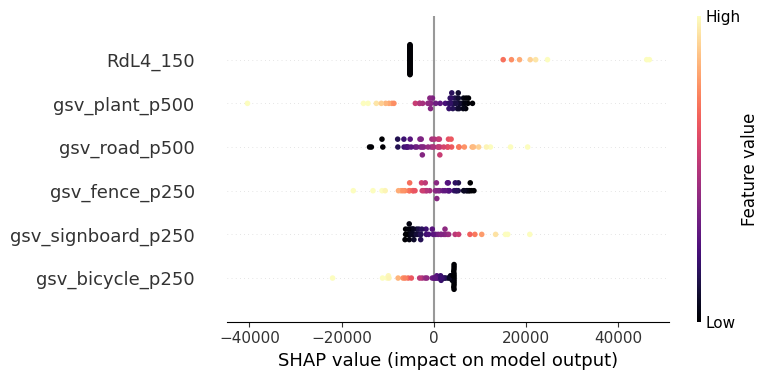

In [ ]:
shap.summary_plot(shap_values,
                  X_train,
                  cmap = "magma")

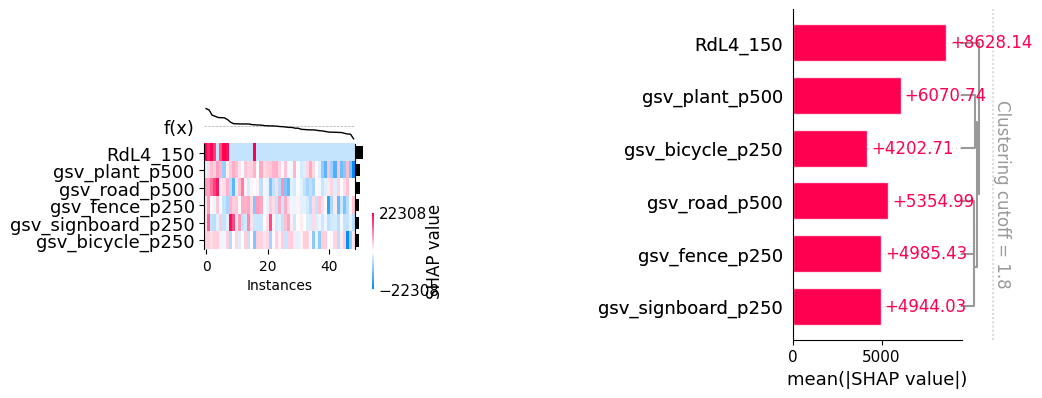

In [ ]:

plt.subplot(1,2,1)

# Plot shap.summary_plot() as the first subplot
shap.plots.heatmap(shap_values_ebm[:49],instance_order=shap_values_ebm.sum(1), show=False)


plt.subplot(1,2,2)
# Adjust the layout and display the plots
# Plot shap.plots.bar() as the second subplot
shap.plots.bar(shap_values_ebm, clustering=clustering, clustering_cutoff=1.8, show=False)
plt.tight_layout()
plt.gcf().set_size_inches(12,4)
plt.show()

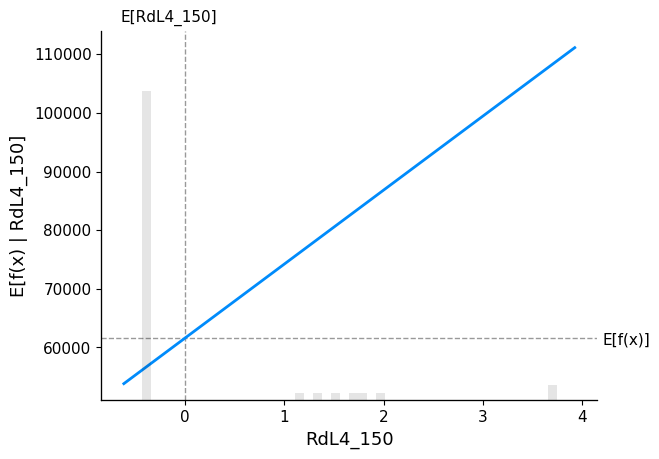

In [ ]:
shap.partial_dependence_plot(
    "RdL4_150", model.predict, X_train, model_expected_value=True,
    feature_expected_value=True, ice=False)

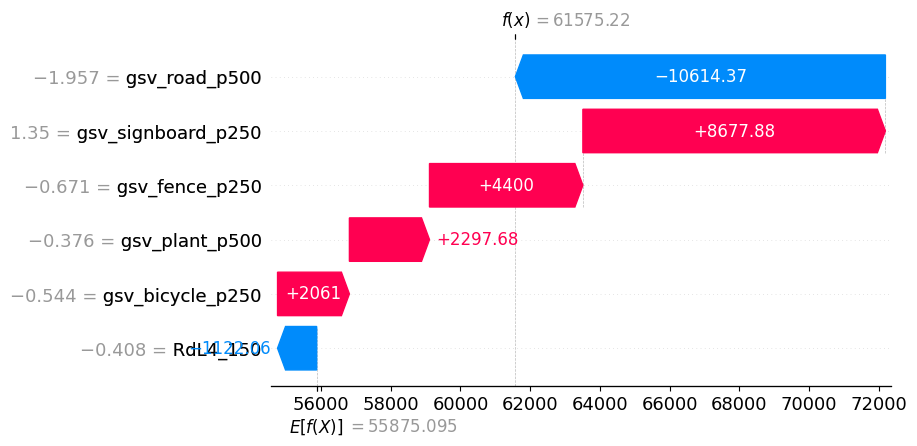

In [ ]:
sample_ind = 1
explainer = shap.Explainer(model, x_pred_new)
shap_values = explainer(x_pred_new)
shap.plots.waterfall(shap_values[sample_ind])

In [ ]:
clustering = shap.utils.hclust(x_pred_new, prediction)

NameError: ignored

In [ ]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=1.8)

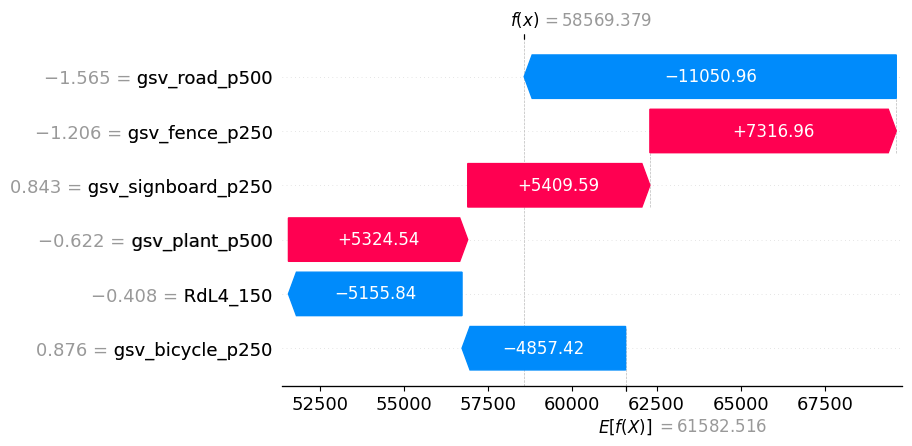

In [ ]:
sample_ind = 1
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[sample_ind])

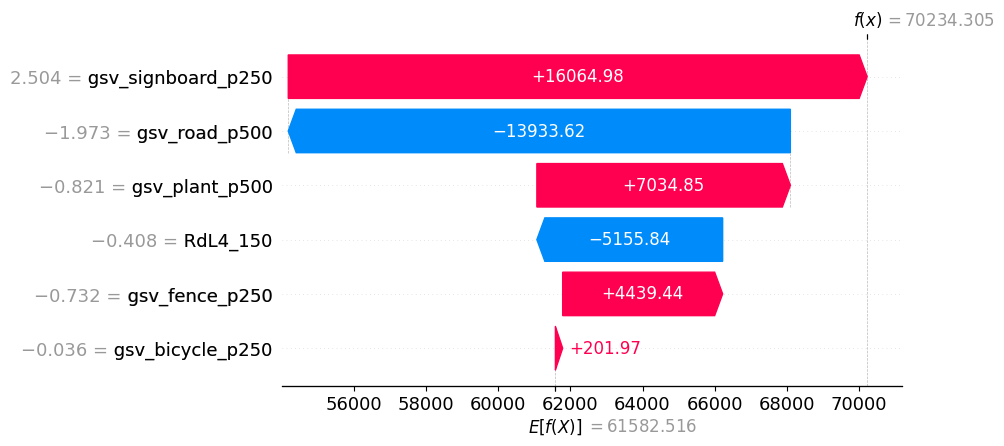

In [ ]:
sample_ind = 0
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[sample_ind])

In [ ]:
type(shap_values)

numpy.ndarray

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


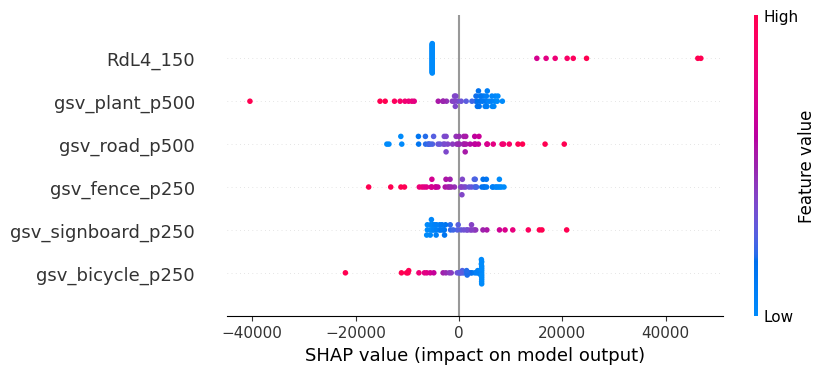

In [ ]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values)

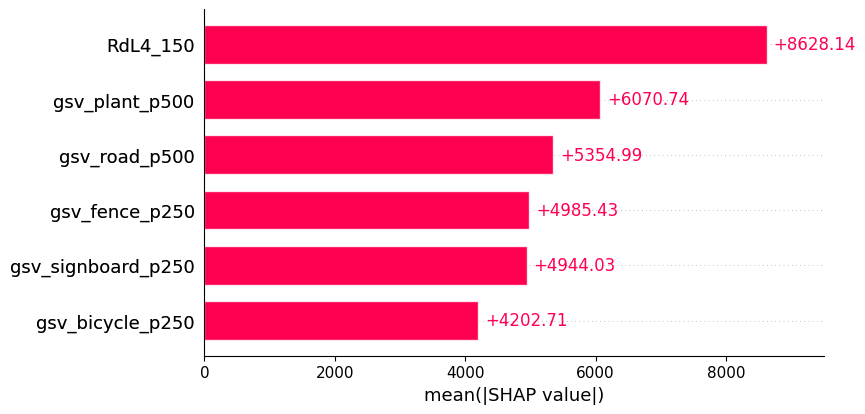

In [ ]:
shap.plots.bar(shap_values)

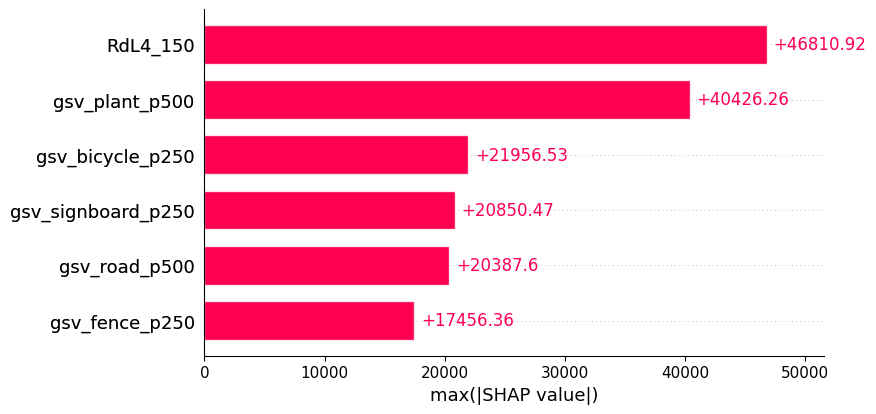

In [ ]:
shap.plots.bar(shap_values.abs.max(0))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


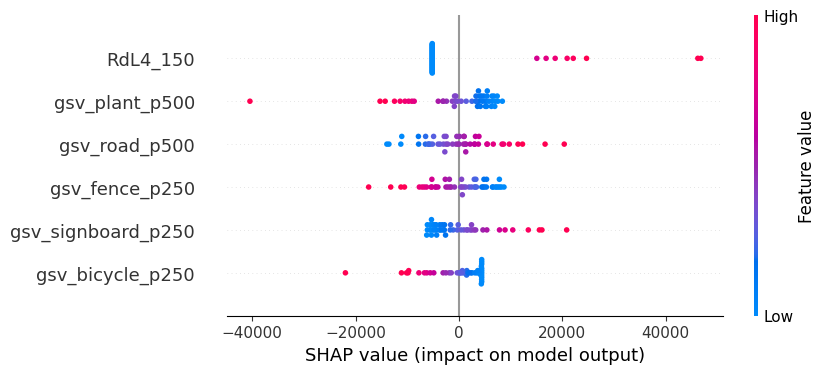

In [ ]:
shap.plots.beeswarm(shap_values)

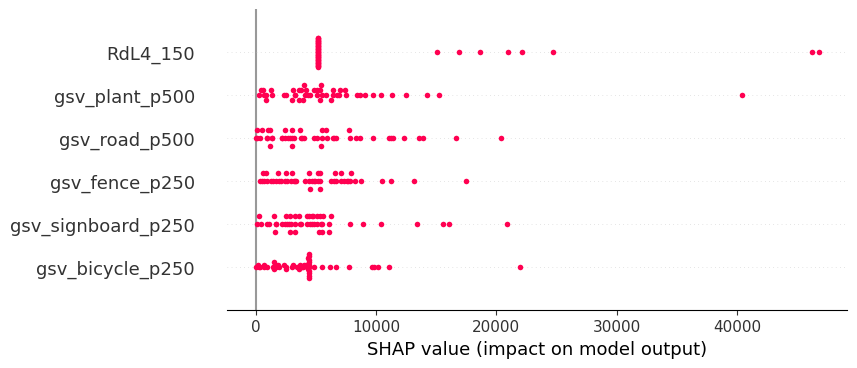

In [ ]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

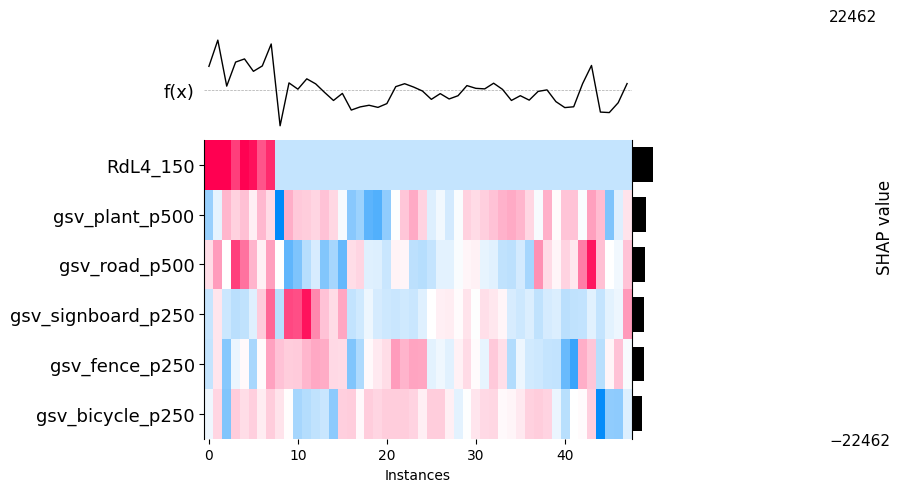

In [ ]:
shap.plots.heatmap(shap_values[:48])

In [ ]:
clustering = shap.utils.hclust(X_train, y)

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


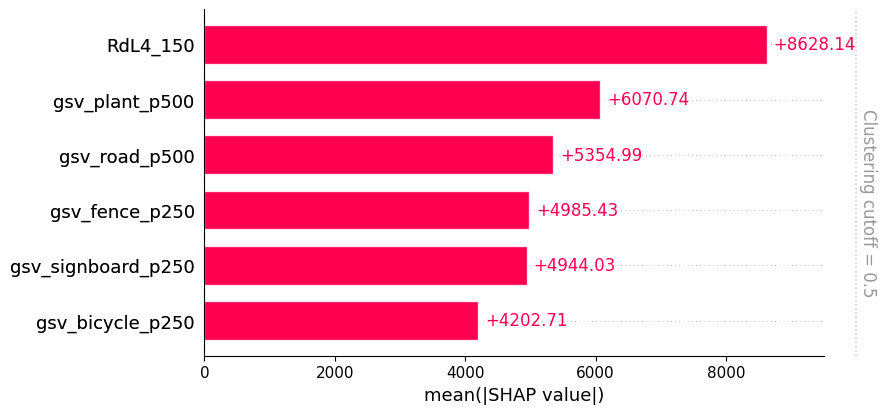

In [ ]:
shap.plots.bar(shap_values, clustering=clustering)

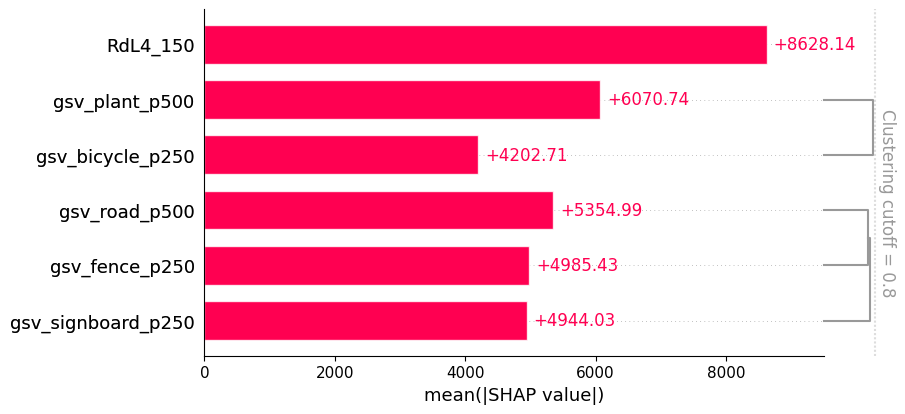

In [ ]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.8)

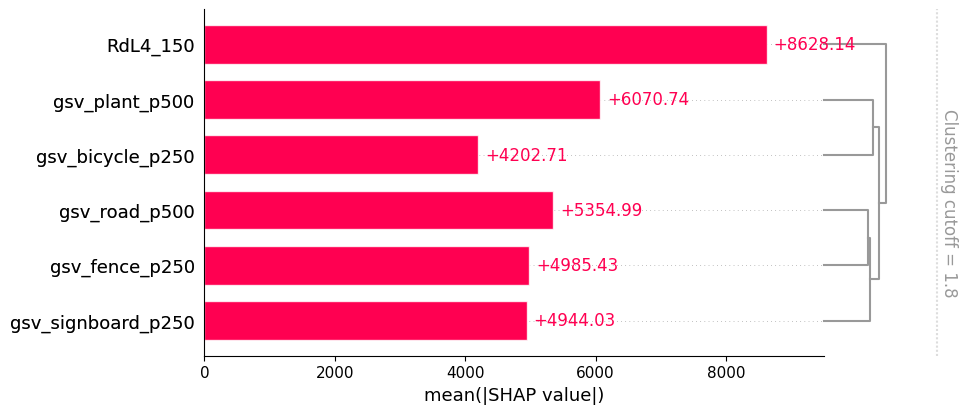

In [ ]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=1.8)

gsv_fence_p250       -1.439178
gsv_bicycle_p250     -0.795388
gsv_signboard_p250   -0.970380
gsv_plant_p500       -0.981640
gsv_road_p500        -1.973119
RdL4_150             -0.408242
dtype: float64
gsv_fence_p250        2.878325
gsv_bicycle_p250      3.957859
gsv_signboard_p250    3.249728
gsv_plant_p500        4.720386
gsv_road_p500         2.887058
RdL4_150              3.706507
dtype: float64
r2 score for train data in LR: 0.606142830551275
cross validation r2 score: 0.577706002630535


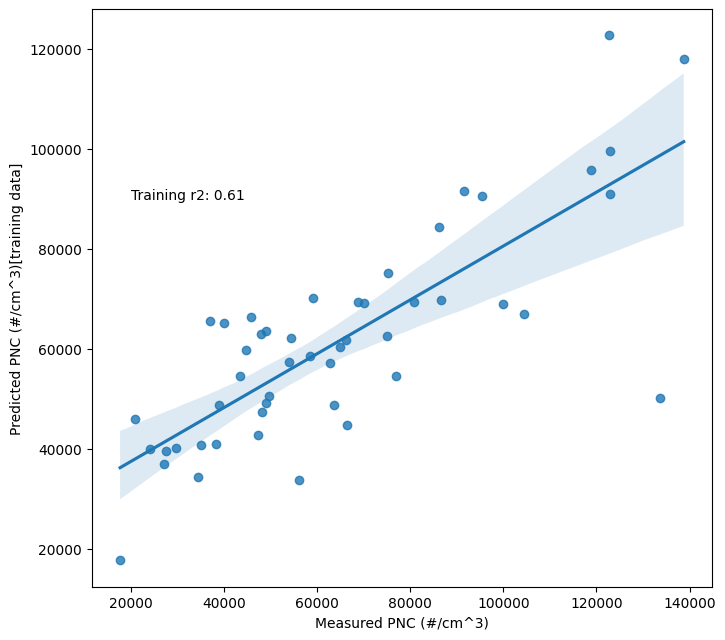

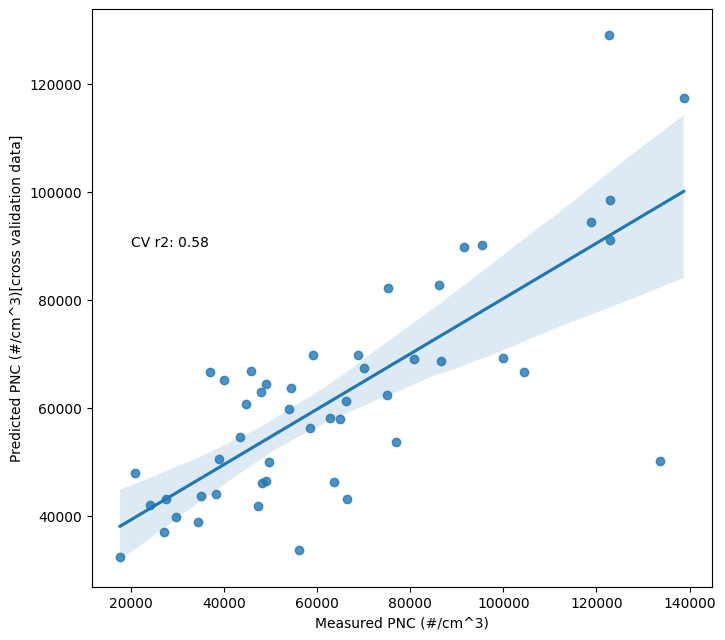

Minimum prediction value: 11570.906870217084
Corresponding row: prediction    11570.906870
Latitude         23.764099
Longitude        90.383789
Name: 5103, dtype: float64
Minimum prediction value: 132841.743458383
Corresponding row: prediction    132841.743458
Latitude          23.847015
Longitude         90.410889
Name: 9350, dtype: float64
0


In [ ]:
lst1 = most_relevant_features
df_relevant = X_st[lst1]
x_pred_relevant = x_pred_st[lst1]

# For each feature, find the minimum and maximum values in the Df dataset
feature_min = df_relevant.min()
feature_max = df_relevant.max()
print(feature_min)
print(feature_max)

# Initialize a list to store the indices of rows to keep
rows_to_keep = []

# Iterate over each row in the X_Pred dataset
for i, row in x_pred_relevant.iterrows():
    # Initialize a flag to check if this row should be kept
    keep_row = True

    # Iterate over each feature in the row
    for feature in lst1:
        # Check if the value for this feature falls outside the range of values in the Df dataset
        if row[feature] < feature_min[feature] or row[feature] > feature_max[feature]:
            # If it does, mark this row as one to skip
            keep_row = False
            break

    # If the row passed the checks, append its index to the list of rows to keep
    if keep_row:
        rows_to_keep.append(i)

# Use the list of indices to select only the rows that should be kept
x_pred_filtered = x_pred_relevant.loc[rows_to_keep]




model = SVR(C=1589,
              kernel='linear',
              gamma=19.598320189651393,
              # epsilon=best_params['epsilon'],
              # shrinking=best_params['shrinking']
            )
              # epsilon=best_params['epsilon'],
              # shrinking=best_params['shrinking']


X_train= X_st[lst1]

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

txt1 = "Training r2: " + str(round(r2_per,2))
txt2 = "CV r2: " + str(round(scores,2))

fig1 = plt.figure(figsize=(8, 7.5))
sns.regplot(x=y, y=pred_train)
plt.xlabel("Measured PNC (#/cm^3)")
plt.ylabel("Predicted PNC (#/cm^3)[training data]")
plt.text(20000, 90000,  txt1)

fig2 = plt.figure(figsize=(8, 7.5))
sns.regplot(x=y, y=predicted)
plt.xlabel("Measured PNC (#/cm^3)")
plt.ylabel("Predicted PNC (#/cm^3)[cross validation data]")
plt.text(20000, 90000,  txt2)

plt.show()


x_pred_new = x_pred_filtered
pred_train=model.predict(x_pred_new)
pred = pd.DataFrame(index=x_pred_new.index)
pred['prediction'] = pred_train
pred['Latitude'] = X_Pred.loc[pred.index, 'Latitude'].values
pred['Longitude'] = X_Pred.loc[pred.index, 'Longitude'].values
pred.to_csv('/content/SVR_GSV.csv')

min_prediction_index = pred['prediction'].idxmin()
min_prediction_row = pred.loc[min_prediction_index]

print("Minimum prediction value:", min_prediction_row['prediction'])
print("Corresponding row:", min_prediction_row)

max_prediction_index = pred['prediction'].idxmax()
max_prediction_row = pred.loc[max_prediction_index]

print("Minimum prediction value:", max_prediction_row['prediction'])
print("Corresponding row:", max_prediction_row)

num_negatives = (pred['prediction'] <0).sum()

print(num_negatives)

perm = PermutationImportance(model).fit(X_train, y)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

gsv_fence_p250       -1.439178
gsv_bicycle_p250     -0.795388
gsv_signboard_p250   -0.970380
gsv_plant_p500       -0.981640
gsv_road_p500        -1.973119
RdL4_150             -0.408242
dtype: float64
gsv_fence_p250        2.878325
gsv_bicycle_p250      3.957859
gsv_signboard_p250    3.249728
gsv_plant_p500        4.720386
gsv_road_p500         2.887058
RdL4_150              3.706507
dtype: float64
r2 score for train data in LR: 0.606142830551275
cross validation r2 score: 0.577706002630535


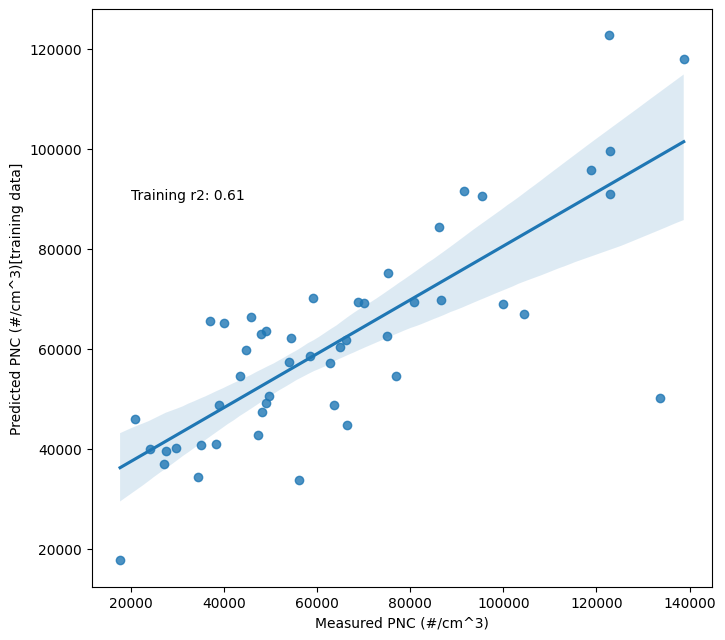

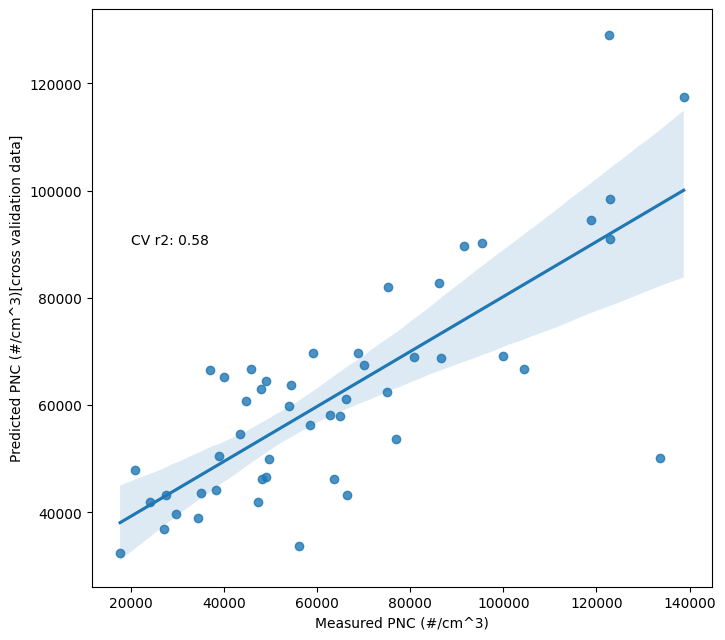

Minimum prediction value: 11570.906870217084
Corresponding row: prediction    11570.906870
Latitude         23.764099
Longitude        90.383789
Name: 5103, dtype: float64
Minimum prediction value: 132841.743458383
Corresponding row: prediction    132841.743458
Latitude          23.847015
Longitude         90.410889
Name: 9350, dtype: float64
0


In [ ]:
lst1 = most_relevant_features
df_relevant = X_st[lst1]
x_pred_relevant = x_pred_st[lst1]

# For each feature, find the minimum and maximum values in the Df dataset
feature_min = df_relevant.min()
feature_max = df_relevant.max()
print(feature_min)
print(feature_max)

# Initialize a list to store the indices of rows to keep
rows_to_keep = []

# Iterate over each row in the X_Pred dataset
for i, row in x_pred_relevant.iterrows():
    # Initialize a flag to check if this row should be kept
    keep_row = True

    # Iterate over each feature in the row
    for feature in lst1:
        # Check if the value for this feature falls outside the range of values in the Df dataset
        if row[feature] < feature_min[feature] or row[feature] > feature_max[feature]:
            # If it does, mark this row as one to skip
            keep_row = False
            break

    # If the row passed the checks, append its index to the list of rows to keep
    if keep_row:
        rows_to_keep.append(i)

# Use the list of indices to select only the rows that should be kept
x_pred_filtered = x_pred_relevant.loc[rows_to_keep]




model = SVR(C=1589,
              kernel='linear',
              gamma=19.598320189651393,
              # epsilon=best_params['epsilon'],
              # shrinking=best_params['shrinking']
            )
              # epsilon=best_params['epsilon'],
              # shrinking=best_params['shrinking']


X_train= X_st[lst1]

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

txt1 = "Training r2: " + str(round(r2_per,2))
txt2 = "CV r2: " + str(round(scores,2))

fig1 = plt.figure(figsize=(8, 7.5))
sns.regplot(x=y, y=pred_train)
plt.xlabel("Measured PNC (#/cm^3)")
plt.ylabel("Predicted PNC (#/cm^3)[training data]")
plt.text(20000, 90000,  txt1)

fig2 = plt.figure(figsize=(8, 7.5))
sns.regplot(x=y, y=predicted)
plt.xlabel("Measured PNC (#/cm^3)")
plt.ylabel("Predicted PNC (#/cm^3)[cross validation data]")
plt.text(20000, 90000,  txt2)

plt.show()


x_pred_new = x_pred_filtered
pred_train=model.predict(x_pred_new)
pred = pd.DataFrame(index=x_pred_new.index)
pred['prediction'] = pred_train
pred['Latitude'] = X_Pred.loc[pred.index, 'Latitude'].values
pred['Longitude'] = X_Pred.loc[pred.index, 'Longitude'].values
pred.to_csv('/content/SVR_GSV.csv')

min_prediction_index = pred['prediction'].idxmin()
min_prediction_row = pred.loc[min_prediction_index]

print("Minimum prediction value:", min_prediction_row['prediction'])
print("Corresponding row:", min_prediction_row)

max_prediction_index = pred['prediction'].idxmax()
max_prediction_row = pred.loc[max_prediction_index]

print("Minimum prediction value:", max_prediction_row['prediction'])
print("Corresponding row:", max_prediction_row)

num_negatives = (pred['prediction'] <0).sum()

print(num_negatives)

perm = PermutationImportance(model).fit(X_train, y)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
X_st_n = X_st
for x in range(2,11):
  lst1=[]

  feature_names = np.array(X_st_n.columns)

  estimator = SVR(C=best_params['C'],
              kernel='linear',
              gamma=best_params['gamma'],
              # epsilon=best_params['epsilon'],
              # shrinking=best_params['shrinking']
              )

  selector = RFE(estimator, n_features_to_select=x)
  selector.fit(X_st_n, y)
  print(f"selected features: {x}")
  selected_features = X_st_n.columns[selector.get_support()]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 24.063s


In [ ]:
lst2

[['gsv_house_p750', 'RdAll_150'],
 ['gsv_grass_p100', 'gsv_house_p750', 'RdAll_150'],
 ['gsv_grass_p100', 'gsv_fence_p250', 'gsv_house_p750', 'RdAll_150'],
 ['gsv_grass_p100',
  'gsv_fence_p250',
  'gsv_house_p750',
  'RdAll_150',
  'RdL3_150'],
 ['gsv_building_p100',
  'gsv_grass_p100',
  'gsv_fence_p250',
  'gsv_house_p750',
  'RdAll_150',
  'RdL3_150'],
 ['gsv_building_p100',
  'gsv_grass_p100',
  'gsv_fence_p250',
  'gsv_house_p750',
  'RdAll_150',
  'RdL3_1000',
  'RdL3_150'],
 ['gsv_building_p100',
  'gsv_grass_p100',
  'gsv_fence_p250',
  'gsv_poster_p250',
  'gsv_house_p750',
  'RdAll_150',
  'RdL3_1000',
  'RdL3_150'],
 ['gsv_building_p100',
  'gsv_grass_p100',
  'gsv_fence_p250',
  'gsv_poster_p250',
  'gsv_house_p750',
  'RdAll_150',
  'RdL3_1000',
  'RdL3_150',
  'rest_s500'],
 ['gsv_building_p100',
  'gsv_grass_p100',
  'gsv_fence_p250',
  'gsv_poster_p250',
  'gsv_house_p750',
  'gsv_truck_p1000',
  'RdAll_150',
  'RdL3_1000',
  'RdL3_150',
  'rest_s500']]

r2 score for train data in LR: 0.5123761152199298
cross validation r2 score:
0.466289790368034
r2 score for train data in LR: 0.6192304506694837
cross validation r2 score:
0.44923139928711786
r2 score for train data in LR: 0.655428832920055
cross validation r2 score:
0.4884456841563599
r2 score for train data in LR: 0.7000128483828053
cross validation r2 score:
0.482573753154234
r2 score for train data in LR: 0.7367672549765858
cross validation r2 score:
0.4738980137159228
r2 score for train data in LR: 0.7457011091056891
cross validation r2 score:
0.5634967305737856
r2 score for train data in LR: 0.7741621537805161
cross validation r2 score:
0.5903788043277542
r2 score for train data in LR: 0.8287629941369123
cross validation r2 score:
0.6415593297898023
r2 score for train data in LR: 0.8572586882776456
cross validation r2 score:
0.6958185883261172


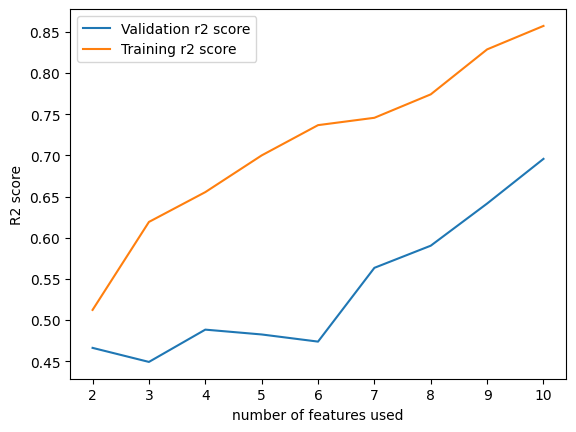

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=SVR(C=best_params['C'],
            kernel='linear',
            gamma=best_params['gamma'],
            # epsilon=best_params['epsilon'],
            # shrinking=best_params['shrinking']
            )
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')

  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)

  scores = r2_score(y, predicted)


  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error')
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
most_relevant_features= ['gsv_grass_p100', 'gsv_fence_p250', 'gsv_house_p750', 'RdAll_150']
X_train=X_st[most_relevant_features]

def objective(trial):
    C = int(trial.suggest_int("C", 1, 100000))
    #kernel = trial.suggest_categorical("kernel", ['rbf','linear'])
    gamma = trial.suggest_float("gamma", 0.001, 10000, log=True)
    # epsilon = trial.suggest_float("epsilon", 0.00000000000000001, .99, log=True)
    # shrinking = trial.suggest_categorical("shrinking", [True,False])
    ## Create Model
    regressor = SVR(C=C,kernel='linear',gamma=gamma)
    regressor.fit(X_train,y)
    pred_train=regressor.predict(X_train)
    r2_per= r2_score(y, pred_train)
    predicted= cross_val_predict(regressor, X_train, y, cv=10)
    r2 = r2_score(y, predicted)
    threshold = 0.05

    # Penalize the objective if the difference between r2 and r2_per is greater than the threshold
    if r2 > .6 and abs(r2_per-r2) < threshold:

      x = r2*10

    else:

      x = r2

    return x

study = optuna.create_study(study_name="SVR",direction='maximize')
study.optimize(objective, n_trials=1000)

In [ ]:
X_train=X_st[most_relevant_features]
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

# Load data

model = SVR(**best_params,
              kernel='linear')
model.fit(X_train,y)

# Calculate permutation importance
perm = PermutationImportance(model).fit(X_train, y)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=e2074433bda7aa8f25401abcdb7c8f8c753c10ae007dd87da49d5e12193ba9bc
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [ ]:
eli5.show_weights(perm, feature_names=X_train.columns.tolist(), show_feature_values=True, top=None)

# **XGB**

In [ ]:
import xgboost as xgb


In [ ]:
dtrain = xgb.DMatrix(X_st, label=y)

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]

  feature_names = np.array(X_st.columns)

  estimator = XGBRegressor(booster='gblinear',objective= "reg:squarederror")

  selector = RFE(estimator, n_features_to_select=x)
  selector.fit(X_st, y)
  print(f"selected features: {x}")
  selected_features = X_st.columns[selector.get_support()]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 76.393s


r2 score for train data in LR: 0.3272850214874611
cross validation r2 score:
0.19082336967237368
r2 score for train data in LR: 0.43078703206463553
cross validation r2 score:
0.2730006271991582
r2 score for train data in LR: 0.6615956800351079
cross validation r2 score:
0.4854533377892989
r2 score for train data in LR: 0.7895073202403031
cross validation r2 score:
0.6617123624636542
r2 score for train data in LR: 0.7245645019888964
cross validation r2 score:
0.3308123177423573
r2 score for train data in LR: 0.800881561046719
cross validation r2 score:
0.6420452761563344
r2 score for train data in LR: 0.8463200732756161
cross validation r2 score:
0.5645246722667487
r2 score for train data in LR: 0.8017729193823497
cross validation r2 score:
0.17924013159781915
r2 score for train data in LR: 0.8838838182244779
cross validation r2 score:
0.6989055119715754


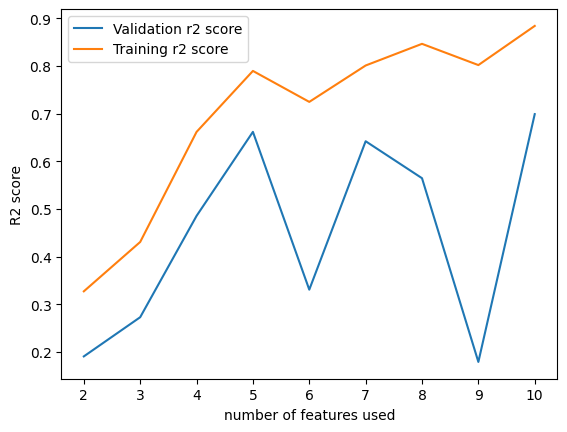

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=XGBRegressor(booster='gblinear',objective= "reg:squarederror" )
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')

  predicted= cross_val_predict(model, X_Train, y, cv=10)

  scores = r2_score(y, predicted)


  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error')
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['gsv_car_p100', 'RdL1_100'],
 ['gsv_signboard_p250', 'gsv_road_p500', 'distPrim'],
 ['gsv_field_p100', 'gsv_signboard_p250', 'gsv_fence_p1250', 'RdL4_150'],
 ['gsv_field_p100',
  'gsv_house_p500',
  'gsv_streetligh_p1000',
  'gsv_truck_p1000',
  'RdL4_150'],
 ['gsv_field_p100',
  'gsv_house_p500',
  'gsv_streetligh_p1000',
  'gsv_truck_p1000',
  'gsv_streetligh_p1500',
  'RdL4_150'],
 ['gsv_house_p100',
  'gsv_grass_p100',
  'gsv_car_p100',
  'gsv_fence_p1250',
  'gsv_truck_p1250',
  'RdL1_100',
  'distPrim'],
 ['gsv_van_p100',
  'gsv_fence_p250',
  'gsv_signboard_p250',
  'gsv_plant_p500',
  'gsv_road_p500',
  'gsv_bicycle_p750',
  'gsv_fence_p1500',
  'distPrim'],
 ['gsv_signboard_p250',
  'gsv_road_p500',
  'gsv_awning_p750',
  'gsv_plant_p750',
  'gsv_bicycle_p750',
  'gsv_fence_p1250',
  'RdL2_250',
  'RdL4_100',
  'distPrim'],
 ['gsv_field_p100',
  'gsv_signboard_p250',
  'gsv_house_p500',
  'gsv_road_p500',
  'gsv_streetligh_p1000',
  'gsv_fence_p1000',
  'gsv_truck_p1000',
  

In [ ]:
X_Train= X_st[lst2[3]]
#X_Train= X_st[['gsv_signboard_p250', 'gsv_house_p500', 'gsv_road_p500', 'RdL4_150']]
# X_Train= X_st[['gsv_grass_p100',
#   'gsv_fence_p1000',
#   'gsv_signboard_p1000',
#   'gsv_awning_p3000',
#   'land_Ar_p_1500',
#   'RdL4_100',
#   'RdL4_5000']]
def objective(trial):

      #gamma = trial.suggest_float('gamma', 0, 4000)
      learning_rate= trial.suggest_float('learning_rate', .005, 1.5)
      #max_depth = int(trial.suggest_int('max_depth', 50, 5000))
      #min_child_weight= int(trial.suggest_int('min_child_weight', 0, 2000))
      n_estimators = int(trial.suggest_int('n_estimators', 50, 1000))
      reg_alpha= trial.suggest_float('reg_alpha', .1, 100)
      reg_lambda= trial.suggest_float('reg_lambda', .1, 3)
      #subsample= trial.suggest_float('subsample', .6, 1)
      XGB = XGBRegressor(booster='gblinear',
                         n_estimators=n_estimators,
                        #  max_depth=max_depth,
                        #  gamma=gamma,
                         learning_rate=learning_rate,
                        #  min_child_weight=min_child_weight,
                         reg_alpha=reg_alpha,
                         reg_lambda=reg_lambda,
                        #  subsample=subsample,
                         objective= "reg:squarederror",
                         seed=42)

      predicted= cross_val_predict(XGB, X_Train, y,
                            cv=10)
      return r2_score(y, predicted)

study = optuna.create_study(direction='maximize',study_name = "XGB")
study.optimize(objective, n_trials=50)

[I 2024-06-09 00:10:37,044] A new study created in memory with name: XGB
[I 2024-06-09 00:10:38,301] Trial 0 finished with value: 0.4893904422184958 and parameters: {'learning_rate': 0.08562231454568323, 'n_estimators': 158, 'reg_alpha': 51.55392984284788, 'reg_lambda': 0.9898197879863225}. Best is trial 0 with value: 0.4893904422184958.
[I 2024-06-09 00:10:40,320] Trial 1 finished with value: 0.3296324349673101 and parameters: {'learning_rate': 0.7799871418921741, 'n_estimators': 532, 'reg_alpha': 39.672705638170726, 'reg_lambda': 2.237022658813329}. Best is trial 0 with value: 0.4893904422184958.
[I 2024-06-09 00:10:45,014] Trial 2 finished with value: 0.27491971392015246 and parameters: {'learning_rate': 1.2258563550827681, 'n_estimators': 961, 'reg_alpha': 58.84739135690769, 'reg_lambda': 2.8605051520735745}. Best is trial 0 with value: 0.4893904422184958.
[I 2024-06-09 00:10:48,035] Trial 3 finished with value: 0.42189776282818436 and parameters: {'learning_rate': 0.89963942308904

In [ ]:
study.optimize(objective, n_trials=500)

[I 2024-06-09 00:11:41,279] Trial 50 finished with value: 0.344926683026346 and parameters: {'learning_rate': 0.7577563989814493, 'n_estimators': 487, 'reg_alpha': 94.45291385561444, 'reg_lambda': 2.0535207438946874}. Best is trial 12 with value: 0.648333596483617.
[I 2024-06-09 00:11:42,585] Trial 51 finished with value: 0.64188255681626 and parameters: {'learning_rate': 0.46957414299026135, 'n_estimators': 298, 'reg_alpha': 88.43627765509285, 'reg_lambda': 0.10965164840951751}. Best is trial 12 with value: 0.648333596483617.
[I 2024-06-09 00:11:43,618] Trial 52 finished with value: 0.6220787146111646 and parameters: {'learning_rate': 0.3255546919157563, 'n_estimators': 224, 'reg_alpha': 93.69196371178212, 'reg_lambda': 0.23962682209852448}. Best is trial 12 with value: 0.648333596483617.
[I 2024-06-09 00:11:45,304] Trial 53 finished with value: 0.5886290154559669 and parameters: {'learning_rate': 0.5242022496470772, 'n_estimators': 267, 'reg_alpha': 85.06290032828012, 'reg_lambda': 0

In [ ]:
best_trial = study.best_trial
best_params = best_trial.params
print(f"best parameters: {best_params}")
model = XGBRegressor(booster='gblinear',
                     #gamma=best_params['gamma'],
                     learning_rate=best_params['learning_rate'],
                     #max_depth=best_params['max_depth'],
                     #min_child_weight=best_params['min_child_weight'],
                     n_estimators=best_params['n_estimators'],
                     reg_alpha=best_params['reg_alpha'],
                     reg_lambda=best_params['reg_lambda'],
                     #subsample=best_params['subsample'],
                     objective= "reg:squarederror",
                     seed=42)
model.fit(X_Train,y)
pred_train=model.predict(X_Train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_Train, y, cv=10)
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

best parameters: {'learning_rate': 1.2774040476084365, 'n_estimators': 714, 'reg_alpha': 0.10832565887426937, 'reg_lambda': 0.10015267956517568}
r2 score for train data in LR: 0.7864097675320263
cross validation r2 score: 0.6521539559986773


actual     predicted
site_name                                
Aftabnagar            60300  51723.617188
Agashadek_road        60800  67043.265625
Airport               56900  50083.414062
Azimpur               48400  53698.773438
Baridhara             46000  46023.804688
BUET                  24900  50328.539062
Chandrima_park        23800  32708.097656
Dhanmondi_lake_park   30200  34294.718750
Elephant_road         69000  47744.703125
Eskaton               67600  54314.800781
Farmgate              77200  84517.101562
Gulisthan             84800  86768.507812
Hatirjhil             43600  60643.718750
Jamuna_future_park    64000  66837.015625
Khilgaon              51400  56410.039062
Lalbag                58100  62649.339844
Mirpur_1              68600  74651.328125
Mirpur_DOHS           47600  52725.039062
Mirpur_Milk Vita      83200  57884.230469
Mohakhali             65100  70154.312500
Mohammadpur           47600  58083.621094
Mouchak              109800  78265.015625
New_market            67500  58074.761719
Niketan_park          30000  32002.066406
Rampura               83100  69775.250000
Romna_park            57700  47599.992188
Shangsad_bhaban       68000  58601.296875
Shimanto_square       49100  48130.105469
Square_hospital       52600  55867.605469
Technical             92000  97425.398438
Tejgaon               43300  43293.234375
TSC_DU                65900  62803.394531
US_Embassy            65700  62438.835938
Uttara_Sector1        35100  39957.437500
Uttara_Sector7        27500  43753.289062

In [ ]:
best_trial = study.best_trial
best_params = best_trial.params
print(f"best parameters: {best_params}")
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]

  feature_names = np.array(X_st.columns)

  estimator = XGBRegressor(booster='gblinear',
                          learning_rate=best_params['learning_rate'],
                          n_estimators=best_params['n_estimators'],
                          reg_alpha=best_params['reg_alpha'],
                          reg_lambda=best_params['reg_lambda'],
                          objective= "reg:squarederror",
                          seed=42)

  selector = RFE(estimator, n_features_to_select=x)
  selector.fit(X_st, y)
  print(f"selected features: {x}")
  selected_features = X_st.columns[selector.get_support()]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

best parameters: {'learning_rate': 1.2774040476084365, 'n_estimators': 714, 'reg_alpha': 0.10832565887426937, 'reg_lambda': 0.10015267956517568}
selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 319.144s


r2 score for train data in LR: 0.556570752978422
cross validation r2 score:
0.44418452322888136
r2 score for train data in LR: 0.6353459866711955
cross validation r2 score:
0.4807246230084644
r2 score for train data in LR: 0.6912386701193391
cross validation r2 score:
0.5432052306115834
r2 score for train data in LR: 0.7616863584700435
cross validation r2 score:
0.6374304537366038
r2 score for train data in LR: 0.8129990707932172
cross validation r2 score:
0.715606485738624
r2 score for train data in LR: 0.8553857219839007
cross validation r2 score:
0.6746727487760591
r2 score for train data in LR: 0.889918085033866
cross validation r2 score:
0.7221586396033184
r2 score for train data in LR: 0.9097131734367572
cross validation r2 score:
0.7498220722952417
r2 score for train data in LR: 0.924440384354038
cross validation r2 score:
0.7677903738316081


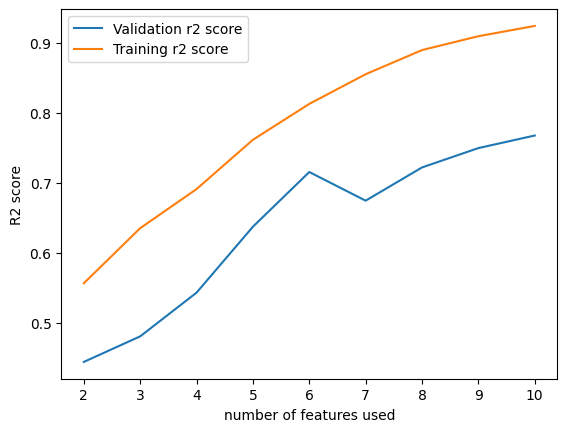

In [ ]:
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=XGBRegressor(booster='gblinear',
                          learning_rate=best_params['learning_rate'],
                          n_estimators=best_params['n_estimators'],
                          reg_alpha=best_params['reg_alpha'],
                          reg_lambda=best_params['reg_lambda'],
                          objective= "reg:squarederror",
                          seed=42)
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')

  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)

  scores = r2_score(y, predicted)


  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error')
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['gsv_house_p750', 'RdAll_150'],
 ['gsv_house_p750', 'RdAll_150', 'RdL3_1000'],
 ['gsv_house_p750', 'RdAll_150', 'RdclS_500', 'RdL3_1000'],
 ['gsv_poster_p250', 'gsv_house_p750', 'RdAll_150', 'RdclS_500', 'RdL3_1000'],
 ['gsv_fence_p150',
  'gsv_poster_p250',
  'gsv_house_p750',
  'RdAll_150',
  'RdclS_500',
  'RdL3_1000'],
 ['gsv_grass_p100',
  'gsv_fence_p150',
  'gsv_poster_p250',
  'gsv_house_p750',
  'RdAll_150',
  'RdclS_500',
  'RdL3_1000'],
 ['gsv_grass_p100',
  'gsv_fence_p150',
  'gsv_poster_p250',
  'gsv_sidewalk_p500',
  'gsv_house_p750',
  'RdAll_150',
  'RdclS_500',
  'RdL3_1000'],
 ['gsv_grass_p100',
  'gsv_fence_p150',
  'gsv_plant_p250',
  'gsv_poster_p250',
  'gsv_sidewalk_p500',
  'gsv_house_p750',
  'RdAll_150',
  'RdclS_500',
  'RdL3_1000'],
 ['gsv_grass_p100',
  'gsv_fence_p150',
  'gsv_plant_p250',
  'gsv_poster_p250',
  'gsv_sidewalk_p500',
  'gsv_house_p750',
  'RdAll_150',
  'RdclT_150',
  'RdclS_500',
  'RdL3_1000']]

In [ ]:
X_Train= X_st[lst2[4]]
#X_Train= X_st[['gsv_signboard_p250', 'gsv_house_p500', 'gsv_road_p500', 'RdL4_150']]
# X_Train= X_st[['gsv_grass_p100',
#   'gsv_fence_p1000',
#   'gsv_signboard_p1000',
#   'gsv_awning_p3000',
#   'land_Ar_p_1500',
#   'RdL4_100',
#   'RdL4_5000']]
def objective(trial):


      learning_rate= trial.suggest_float('learning_rate', .005, 1.5)
      n_estimators = int(trial.suggest_int('n_estimators', 50, 1000))
      reg_alpha= trial.suggest_float('reg_alpha', .1, 100)
      reg_lambda= trial.suggest_float('reg_lambda', .1, 3)
      XGB = XGBRegressor(booster='gblinear',
                         n_estimators=n_estimators,
                         learning_rate=learning_rate,
                         reg_alpha=reg_alpha,
                         reg_lambda=reg_lambda,
                         objective= "reg:squarederror",
                         seed=42)

      XGB.fit(X_train,y)
      pred_train=XGB.predict(X_train)
      r2_per= r2_score(y, pred_train)
      predicted= cross_val_predict(XGB, X_train, y, cv=10)
      r2 = r2_score(y, predicted)
      threshold = 0.05

      # Penalize the objective if the difference between r2 and r2_per is greater than the threshold
      if r2 > .5 and abs(r2_per-r2) < threshold:

        x = r2*10

      else:

        x = r2

      return x


study = optuna.create_study(direction='maximize',study_name = "XGB")
study.optimize(objective, n_trials=500)

[I 2024-06-09 00:26:46,737] A new study created in memory with name: XGB
[I 2024-06-09 00:26:47,486] Trial 0 finished with value: 0.30067676908744545 and parameters: {'learning_rate': 1.1011269735546207, 'n_estimators': 312, 'reg_alpha': 23.972544957378616, 'reg_lambda': 2.013352348310561}. Best is trial 0 with value: 0.30067676908744545.
[I 2024-06-09 00:26:47,728] Trial 1 finished with value: 0.2939771993967769 and parameters: {'learning_rate': 0.1493046716599577, 'n_estimators': 189, 'reg_alpha': 2.0513710658895294, 'reg_lambda': 2.0997226643941445}. Best is trial 0 with value: 0.30067676908744545.
[I 2024-06-09 00:26:48,416] Trial 2 finished with value: 0.3932963248799414 and parameters: {'learning_rate': 1.3695992253283815, 'n_estimators': 839, 'reg_alpha': 0.10297122215631482, 'reg_lambda': 1.1913077379590096}. Best is trial 2 with value: 0.3932963248799414.
[I 2024-06-09 00:26:48,601] Trial 3 finished with value: 0.5115768911602004 and parameters: {'learning_rate': 0.03806307144

In [ ]:
study

In [ ]:
best_trial = study.best_trial
best_params = best_trial.params
print(f"best parameters: {best_params}")
model = XGBRegressor(booster='gblinear',
                     #gamma=best_params['gamma'],
                     learning_rate=best_params['learning_rate'],
                     #max_depth=best_params['max_depth'],
                     #min_child_weight=best_params['min_child_weight'],
                     n_estimators=best_params['n_estimators'],
                     reg_alpha=best_params['reg_alpha'],
                     reg_lambda=best_params['reg_lambda'],
                     #subsample=best_params['subsample'],
                     objective= "reg:squarederror",
                     seed=42)
model.fit(X_Train,y)
pred_train=model.predict(X_Train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_Train, y, cv=10)
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

best parameters: {'learning_rate': 1.3586498246651937, 'n_estimators': 553, 'reg_alpha': 0.23998026190271093, 'reg_lambda': 0.10000668952717931}
r2 score for train data in LR: 0.8130103465695606
cross validation r2 score: 0.7156223058643365


actual     predicted
site_name                                
Aftabnagar            60300  50164.847656
Agashadek_road        60800  51443.621094
Airport               56900  41800.394531
Azimpur               48400  38475.691406
Baridhara             46000  54383.488281
BUET                  24900  45584.238281
Chandrima_park        23800  47772.906250
Dhanmondi_lake_park   30200  43514.421875
Elephant_road         69000  60450.269531
Eskaton               67600  74604.757812
Farmgate              77200  89297.031250
Gulisthan             84800  85607.890625
Hatirjhil             43600  49656.613281
Jamuna_future_park    64000  60662.140625
Khilgaon              51400  61608.445312
Lalbag                58100  60047.246094
Mirpur_1              68600  68456.390625
Mirpur_DOHS           47600  32548.798828
Mirpur_Milk Vita      83200  75853.507812
Mohakhali             65100  63203.382812
Mohammadpur           47600  51632.328125
Mouchak              109800  91907.296875
New_market            67500  62994.273438
Niketan_park          30000  39772.519531
Rampura               83100  71778.359375
Romna_park            57700  54949.171875
Shangsad_bhaban       68000  57647.093750
Shimanto_square       49100  54083.769531
Square_hospital       52600  54756.292969
Technical             92000  94723.328125
Tejgaon               43300  37822.582031
TSC_DU                65900  61041.859375
US_Embassy            65700  57138.980469
Uttara_Sector1        35100  33278.316406
Uttara_Sector7        27500  48119.414062

best parameters: {'learning_rate': 1.3586498246651937, 'n_estimators': 553, 'reg_alpha': 0.23998026190271093, 'reg_lambda': 0.10000668952717931}
selected features: 2
selected features: 3
selected features: 4
selected features: 5
selected features: 6
selected features: 7
selected features: 8
selected features: 9
selected features: 10
Done in 319.102s
r2 score for train data in LR: 0.5565790061857501
cross validation r2 score:
0.44416426514166374
r2 score for train data in LR: 0.6353526459921236
cross validation r2 score:
0.48068965136155284
r2 score for train data in LR: 0.6937176499874073
cross validation r2 score:
0.5435218819439602
r2 score for train data in LR: 0.7514012999301128
cross validation r2 score:
0.6191525110111933
r2 score for train data in LR: 0.8130103536949541
cross validation r2 score:
0.7156224078125503
r2 score for train data in LR: 0.8553953831703033
cross validation r2 score:
0.6746620073458134
r2 score for train data in LR: 0.8899295956757598
cross validation r2 

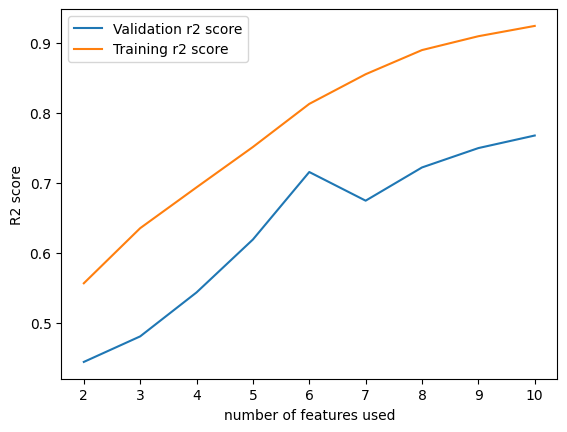

In [ ]:
best_trial = study.best_trial
best_params = best_trial.params
print(f"best parameters: {best_params}")
lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
lst2=[]
tic_fwd = time()
for x in range(2,11):
  lst1=[]

  feature_names = np.array(X_st.columns)

  estimator = XGBRegressor(booster='gblinear',
                          learning_rate=best_params['learning_rate'],
                          n_estimators=best_params['n_estimators'],
                          reg_alpha=best_params['reg_alpha'],
                          reg_lambda=best_params['reg_lambda'],
                          objective= "reg:squarederror",
                          seed=42)

  selector = RFE(estimator, n_features_to_select=x)
  selector.fit(X_st, y)
  print(f"selected features: {x}")
  selected_features = X_st.columns[selector.get_support()]

  for i in selected_features:
    lst1.append(i)
  lst2.append(lst1)

toc_fwd = time()
print(f"Done in {toc_fwd - tic_fwd:.3f}s")

lstfeature=[]
lsttrainr=[]
lsttrainrmse=[]
lstcvr=[]
lstcvrmse=[]
for i in lst2:
  featurs= i
  X_Train=X_st[featurs]
  model=XGBRegressor(booster='gblinear',
                          learning_rate=best_params['learning_rate'],
                          n_estimators=best_params['n_estimators'],
                          reg_alpha=best_params['reg_alpha'],
                          reg_lambda=best_params['reg_lambda'],
                          objective= "reg:squarederror",
                          seed=42)
  model.fit(X_Train,y)
  pred_train=model.predict(X_Train)
  r2_per= r2_score(y, pred_train)
  print("r2 score for train data in LR:",r2_per)
  lsttrainr.append(r2_per)
  # rmse_per= mean_squared_error(y, pred_train, squared= False)
  # print("RMSE score for train data in LR:",rmse_per)
  # lsttrainrmse.append(rmse_per)
  #model fit ends

  #scores = cross_val_score(model, X_Train, y,
                                #cv=10,
                                #scoring='r2')

  predicted= cross_val_predict(model, X_Train, y,
                              cv=10)

  scores = r2_score(y, predicted)


  print("cross validation r2 score:")
  print(scores)
  # print("Average cross validation r2 score:")
  # print(scores.mean())
  lstfeature.append(len(featurs))
  lstcvr.append(scores)
  # scoresrmse = -cross_val_score(model, X_Train, y,
  #                               cv=5,
  #                               scoring='neg_root_mean_squared_error')
  # print("cross validation rmse score:")
  # print(scoresrmse)
  # print("Average cross validation rmse score:")
  # print(scoresrmse.mean())
  # lstcvrmse.append(scoresrmse.mean())
plt.plot(lstfeature, lstcvr, label = "Validation r2 score")
plt.plot(lstfeature, lsttrainr, label = "Training r2 score")
plt.xlabel("number of features used")
plt.ylabel("R2 score")
plt.legend()
plt.show()

In [ ]:
lst2

[['gsv_house_p750', 'RdAll_150'],
 ['gsv_house_p750', 'RdAll_150', 'RdL3_1000'],
 ['gsv_poster_p250', 'gsv_house_p750', 'RdAll_150', 'RdL3_1000'],
 ['gsv_poster_p250', 'gsv_house_p750', 'RdAll_150', 'RdclS_250', 'RdL3_1000'],
 ['gsv_fence_p150',
  'gsv_poster_p250',
  'gsv_house_p750',
  'RdAll_150',
  'RdclS_500',
  'RdL3_1000'],
 ['gsv_grass_p100',
  'gsv_fence_p150',
  'gsv_poster_p250',
  'gsv_house_p750',
  'RdAll_150',
  'RdclS_500',
  'RdL3_1000'],
 ['gsv_grass_p100',
  'gsv_fence_p150',
  'gsv_poster_p250',
  'gsv_sidewalk_p500',
  'gsv_house_p750',
  'RdAll_150',
  'RdclS_500',
  'RdL3_1000'],
 ['gsv_grass_p100',
  'gsv_fence_p150',
  'gsv_plant_p250',
  'gsv_poster_p250',
  'gsv_sidewalk_p500',
  'gsv_house_p750',
  'RdAll_150',
  'RdclS_500',
  'RdL3_1000'],
 ['gsv_grass_p100',
  'gsv_fence_p150',
  'gsv_plant_p250',
  'gsv_poster_p250',
  'gsv_sidewalk_p500',
  'gsv_house_p750',
  'RdAll_150',
  'RdclT_150',
  'RdclS_500',
  'RdL3_1000']]

In [ ]:
X_Train= X_st[['gsv_signboard_p250',
  'gsv_awning_p500',
  'gsv_plant_p500',
  'gsv_road_p500',
  'gsv_bicycle_p500',
  'RdL4_150',
  'distPrim']]
#X_Train= X_st[['gsv_signboard_p250', 'gsv_house_p500', 'gsv_road_p500', 'RdL4_150']]
# X_Train= X_st[['gsv_grass_p100',
#   'gsv_fence_p1000',
#   'gsv_signboard_p1000',
#   'gsv_awning_p3000',
#   'land_Ar_p_1500',
#   'RdL4_100',
#   'RdL4_5000']]
def objective(trial):

      #gamma = trial.suggest_float('gamma', 0, 4000)
      learning_rate= trial.suggest_float('learning_rate', .005, 1.5)
      #max_depth = int(trial.suggest_int('max_depth', 50, 5000))
      #min_child_weight= int(trial.suggest_int('min_child_weight', 0, 2000))
      n_estimators = int(trial.suggest_int('n_estimators', 50, 1000))
      reg_alpha= trial.suggest_float('reg_alpha', .1, 100)
      reg_lambda= trial.suggest_float('reg_lambda', .1, 3)
      #subsample= trial.suggest_float('subsample', .6, 1)
      XGB = XGBRegressor(booster='gblinear',
                         n_estimators=n_estimators,
                        #  max_depth=max_depth,
                        #  gamma=gamma,
                         learning_rate=learning_rate,
                        #  min_child_weight=min_child_weight,
                         reg_alpha=reg_alpha,
                         reg_lambda=reg_lambda,
                        #  subsample=subsample,
                         objective= "reg:squarederror",
                         seed=42)

      XGB.fit(X_train,y)
      pred_train=XGB.predict(X_train)
      r2_per= r2_score(y, pred_train)
      predicted= cross_val_predict(XGB, X_train, y, cv=10)
      r2 = r2_score(y, predicted)
      threshold = 0.1*r2_per

      # Penalize the objective if the difference between r2 and r2_per is greater than the threshold
      if r2 > .5 and abs(r2_per-r2) < threshold:

        x = r2*10

      else:

        x = r2

      return x
study = optuna.create_study(direction='maximize',study_name = "XGB")
study.optimize(objective, n_trials=500)

[I 2023-04-11 05:48:28,526] A new study created in memory with name: XGB
[I 2023-04-11 05:48:31,450] Trial 0 finished with value: 0.4943936945466477 and parameters: {'learning_rate': 0.3298045349849663, 'n_estimators': 757, 'reg_alpha': 11.076893969950904, 'reg_lambda': 0.47837229397523184}. Best is trial 0 with value: 0.4943936945466477.
[I 2023-04-11 05:48:31,790] Trial 1 finished with value: 0.4220629280104633 and parameters: {'learning_rate': 0.771343396434417, 'n_estimators': 395, 'reg_alpha': 52.01622039182205, 'reg_lambda': 0.8458874498795148}. Best is trial 0 with value: 0.4943936945466477.
[I 2023-04-11 05:48:32,025] Trial 2 finished with value: 0.21815211217571495 and parameters: {'learning_rate': 1.488401829578823, 'n_estimators': 227, 'reg_alpha': 50.86071321968784, 'reg_lambda': 2.6382695252989947}. Best is trial 0 with value: 0.4943936945466477.
[I 2023-04-11 05:48:32,370] Trial 3 finished with value: 0.2087840445426149 and parameters: {'learning_rate': 0.0765530198454231

In [ ]:
study.optimize(objective, n_trials=500)

[I 2023-04-11 05:52:23,028] Trial 500 finished with value: 0.4422682417393312 and parameters: {'learning_rate': 0.2433252234146399, 'n_estimators': 217, 'reg_alpha': 14.51943817551139, 'reg_lambda': 0.7439648357954769}. Best is trial 164 with value: 0.5564920173144517.
[I 2023-04-11 05:52:23,317] Trial 501 finished with value: 0.5497378256483659 and parameters: {'learning_rate': 0.18835714439777929, 'n_estimators': 272, 'reg_alpha': 54.98684084980687, 'reg_lambda': 0.1598216445565469}. Best is trial 164 with value: 0.5564920173144517.
[I 2023-04-11 05:52:23,596] Trial 502 finished with value: 0.3377270349034249 and parameters: {'learning_rate': 0.1191227135749694, 'n_estimators': 247, 'reg_alpha': 24.11216780960336, 'reg_lambda': 1.3995687765600837}. Best is trial 164 with value: 0.5564920173144517.
[I 2023-04-11 05:52:23,906] Trial 503 finished with value: 0.5563965676458889 and parameters: {'learning_rate': 1.0497529080108132, 'n_estimators': 282, 'reg_alpha': 5.580285240932136, 'reg

In [ ]:
X_Train = X_st[['gsv_fence_p150',
  'gsv_poster_p250',
  'gsv_house_p750',
  'RdAll_150',
  'RdclS_500',
  'RdL3_1000']]
best_trial = study.best_trial
best_params = best_trial.params
print(f"best parameters: {best_params}")
model = XGBRegressor(booster='gblinear',
                     #gamma=best_params['gamma'],
                     learning_rate=best_params['learning_rate'],
                     #max_depth=best_params['max_depth'],
                     #min_child_weight=best_params['min_child_weight'],
                     n_estimators=best_params['n_estimators'],
                     reg_alpha=best_params['reg_alpha'],
                     reg_lambda=best_params['reg_lambda'],
                     #subsample=best_params['subsample'],
                     objective= "reg:squarederror",
                     seed=42)
model.fit(X_Train,y)
pred_train=model.predict(X_Train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_Train, y, cv=10)
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

best parameters: {'learning_rate': 1.3586498246651937, 'n_estimators': 553, 'reg_alpha': 0.23998026190271093, 'reg_lambda': 0.10000668952717931}
r2 score for train data in LR: 0.8130103447021494
cross validation r2 score: 0.7156224032026072


actual     predicted
site_name                                
Aftabnagar            60300  50164.843750
Agashadek_road        60800  51443.617188
Airport               56900  41800.390625
Azimpur               48400  38475.683594
Baridhara             46000  54383.476562
BUET                  24900  45584.230469
Chandrima_park        23800  47772.898438
Dhanmondi_lake_park   30200  43514.410156
Elephant_road         69000  60450.269531
Eskaton               67600  74604.750000
Farmgate              77200  89297.031250
Gulisthan             84800  85607.890625
Hatirjhil             43600  49656.609375
Jamuna_future_park    64000  60662.140625
Khilgaon              51400  61608.433594
Lalbag                58100  60047.246094
Mirpur_1              68600  68456.390625
Mirpur_DOHS           47600  32548.800781
Mirpur_Milk Vita      83200  75853.507812
Mohakhali             65100  63203.375000
Mohammadpur           47600  51632.320312
Mouchak              109800  91907.289062
New_market            67500  62994.269531
Niketan_park          30000  39772.515625
Rampura               83100  71778.367188
Romna_park            57700  54949.171875
Shangsad_bhaban       68000  57647.089844
Shimanto_square       49100  54083.757812
Square_hospital       52600  54756.289062
Technical             92000  94723.312500
Tejgaon               43300  37822.582031
TSC_DU                65900  61041.863281
US_Embassy            65700  57138.976562
Uttara_Sector1        35100  33278.308594
Uttara_Sector7        27500  48119.414062

In [ ]:
best_trial

FrozenTrial(number=384, state=TrialState.COMPLETE, values=[0.5728679710684352], datetime_start=datetime.datetime(2024, 6, 9, 0, 30, 4, 478625), datetime_complete=datetime.datetime(2024, 6, 9, 0, 30, 5, 41589), params={'learning_rate': 1.3586498246651937, 'n_estimators': 553, 'reg_alpha': 0.23998026190271093, 'reg_lambda': 0.10000668952717931}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'learning_rate': FloatDistribution(high=1.5, log=False, low=0.005, step=None), 'n_estimators': IntDistribution(high=1000, log=False, low=50, step=1), 'reg_alpha': FloatDistribution(high=100.0, log=False, low=0.1, step=None), 'reg_lambda': FloatDistribution(high=3.0, log=False, low=0.1, step=None)}, trial_id=384, value=None)

gsv_fence_p150    -0.804127
gsv_poster_p250   -0.547831
gsv_house_p750    -0.735631
RdAll_150         -1.409728
RdclS_500         -0.764168
RdL3_1000         -1.005055
dtype: float64
gsv_fence_p150     2.757306
gsv_poster_p250    4.283752
gsv_house_p750     4.573802
RdAll_150          2.036422
RdclS_500          4.236389
RdL3_1000          2.575123
dtype: float64
r2 score for train data in LR: 0.8130013075363728
cross validation r2 score: 0.7156089288886323
training r2 score: 0.8130013075363728
training RMSE: 8408.652266714804
training nRMSE: 0.09777502635714888
cross validation r2 score: 0.7156089288886323
cross validation RMSE: 10369.673597623916
cross validation nRMSE: 0.12057759997237112
Minimum prediction value: 25209.6171875
Corresponding row: prediction    25209.617188
Latitude         23.803802
Longitude        90.407288
Name: 7140, dtype: float64
Minimum prediction value: 110573.578125
Corresponding row: prediction    110573.578125
Latitude          23.735199
Longitude        

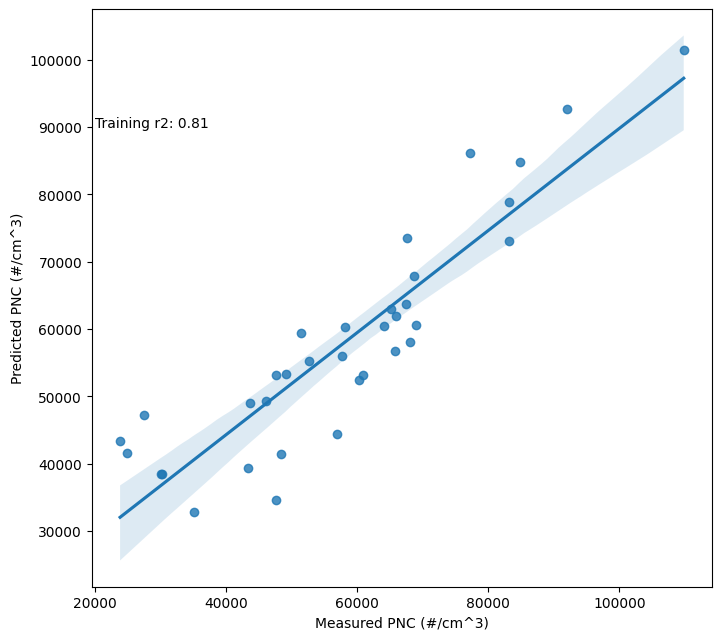

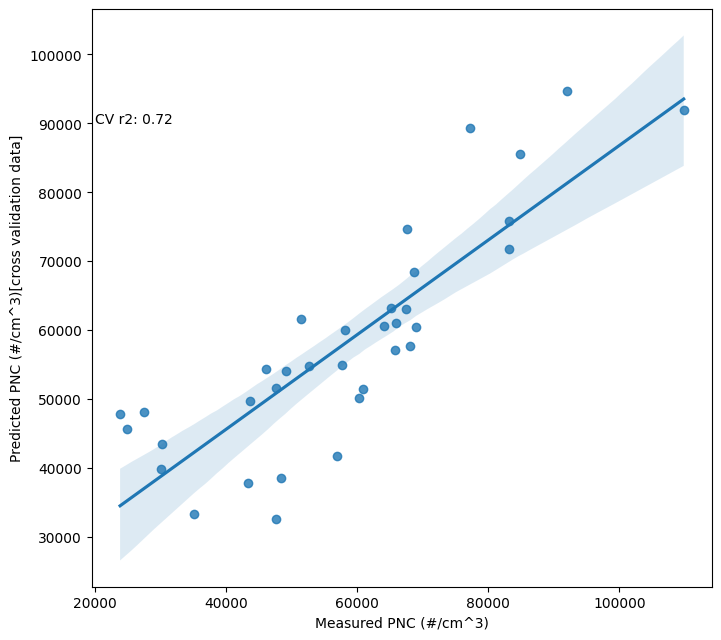

In [ ]:
lst1 = ['gsv_fence_p150',
  'gsv_poster_p250',
  'gsv_house_p750',
  'RdAll_150',
  'RdclS_500',
  'RdL3_1000']
df_relevant = X_st[lst1]
x_pred_relevant = x_pred_st[lst1]

# For each feature, find the minimum and maximum values in the Df dataset
feature_min = df_relevant.min()
feature_max = df_relevant.max()
print(feature_min)
print(feature_max)

# Initialize a list to store the indices of rows to keep
rows_to_keep = []

# Iterate over each row in the X_Pred dataset
for i, row in x_pred_relevant.iterrows():
    # Initialize a flag to check if this row should be kept
    keep_row = True

    # Iterate over each feature in the row
    for feature in lst1:
        # Check if the value for this feature falls outside the range of values in the Df dataset
        if row[feature] < feature_min[feature] or row[feature] > feature_max[feature]:
            # If it does, mark this row as one to skip
            keep_row = False
            break

    # If the row passed the checks, append its index to the list of rows to keep
    if keep_row:
        rows_to_keep.append(i)

# Use the list of indices to select only the rows that should be kept
x_pred_filtered = x_pred_relevant.loc[rows_to_keep]



model = XGBRegressor(booster='gblinear',
                     #gamma=best_params['gamma'],
                     learning_rate= 0.33865731228872975,
                     #max_depth=best_params['max_depth'],
                     #min_child_weight=best_params['min_child_weight'],
                     n_estimators=677,
                     reg_alpha=0.16277287250354888,
                     reg_lambda=0.10011904636561311,
                     #subsample=best_params['subsample'],
                     objective= "reg:squarederror",
                     seed=42)

X_train= X_st[lst1]

model.fit(X_train,y)
pred_train=model.predict(X_train)
r2_per= r2_score(y, pred_train)
predicted= cross_val_predict(model, X_train, y,
                              cv=10)
scores = r2_score(y, predicted)

print("r2 score for train data in LR:",r2_per)
print("cross validation r2 score:",scores)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

txt1 = "Training r2: " + str(round(r2_per,2))
txt2 = "CV r2: " + str(round(scores,2))

rmse = np.sqrt(mean_squared_error(y,predicted))
nrmse = rmse / (np.max(y) - np.min(y))
rmse_t = np.sqrt(mean_squared_error(y,pred_train))
nrmse_t = rmse_t / (np.max(y) - np.min(y))
print("training r2 score:",r2_per)
print("training RMSE:", rmse_t)
print("training nRMSE:", nrmse_t)

print("cross validation r2 score:",scores)
print("cross validation RMSE:", rmse)
print("cross validation nRMSE:", nrmse)
new= pd.DataFrame()
new["actual"]=y
new["predicted"]= predicted
new

txt1 = "Training r2: " + str(round(r2_per,2))
txt2 = "CV r2: " + str(round(scores,2))

fig1 = plt.figure(figsize=(8, 7.5))
sns.regplot(x=y, y=pred_train)
plt.xlabel("Measured PNC (#/cm^3)")
plt.ylabel("Predicted PNC (#/cm^3)")
plt.text(20000, 90000,  txt1)
plt.savefig('/content/xg_train.png')

fig2 = plt.figure(figsize=(8, 7.5))
sns.regplot(x=y, y=predicted)
plt.xlabel("Measured PNC (#/cm^3)")
plt.ylabel("Predicted PNC (#/cm^3)[cross validation data]")
plt.text(20000, 90000,  txt2)
plt.savefig('/content/xg_CV.png')


x_pred_new = x_pred_filtered
pred_train=model.predict(x_pred_new)
pred = pd.DataFrame(index=x_pred_new.index)
pred['prediction'] = pred_train
pred['Latitude'] = X_Pred.loc[pred.index, 'Latitude'].values
pred['Longitude'] = X_Pred.loc[pred.index, 'Longitude'].values
pred.to_csv('/content/XGB_GSV.csv')

min_prediction_index = pred['prediction'].idxmin()
min_prediction_row = pred.loc[min_prediction_index]

print("Minimum prediction value:", min_prediction_row['prediction'])
print("Corresponding row:", min_prediction_row)

max_prediction_index = pred['prediction'].idxmax()
max_prediction_row = pred.loc[max_prediction_index]

print("Minimum prediction value:", max_prediction_row['prediction'])
print("Corresponding row:", max_prediction_row)

num_negatives = (pred['prediction'] <0).sum()

print(num_negatives)

perm = PermutationImportance(model).fit(X_train, y)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

In [ ]:
lst1 = ['gsv_signboard_p250',
  'gsv_awning_p500',
  'gsv_plant_p500',
  'gsv_road_p500',
  'gsv_bicycle_p500',
  'RdL4_150',
  'distPrim']
df_relevant = X_st[lst1]

new_column_names = {
    'gsv_signboard_p250': 'signboard (250 m)',
    'gsv_awning_p500': 'awning (500 m)',
    'gsv_plant_p500': 'plant (500 m)',
    'gsv_road_p500': 'road (500 m)',
    'RdL4_150': '4 lane road (150 m)',
    'distPrim': 'primary road dist.',
    'gsv_bicycle_p500': 'bicycle (250m)'
}

df_relevant = X_st[lst1].rename(columns=new_column_names)

model = XGBRegressor(booster='gblinear',
                     #gamma=best_params['gamma'],
                     learning_rate= 0.33865731228872975,
                     #max_depth=best_params['max_depth'],
                     #min_child_weight=best_params['min_child_weight'],
                     n_estimators=677,
                     reg_alpha=0.16277287250354888,
                     reg_lambda=0.10011904636561311,
                     #subsample=best_params['subsample'],
                     objective= "reg:squarederror",
                     seed=42)

X_train= df_relevant

model.fit(X_train,y)

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.33865731228872975,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=677, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
X_train

gsv_signboard_p250  gsv_awning_p500  gsv_plant_p500  \
site_name                                                                   
Agashadek_road                  2.503869         0.947661       -0.821427   
Lalbag                          0.843132         1.130881       -0.621722   
Gulisthan                      -0.451146        -0.300677       -0.457414   
Polashi                        -0.869883        -0.576964       -0.625919   
BUET                           -0.949976        -0.338181       -0.599910   
Azimpur                        -0.250153         1.365271        1.664753   
Z Hq Hall, DU                  -0.671935        -0.213359       -0.593367   
New_market                     -0.402421         2.420973        1.327781   
Bolaka Cinema Hall              0.066565         2.002535        0.069351   
TSC_DU                         -0.685639        -0.354827        1.135372   
Provat_home                    -0.261116         1.903740        0.361595   
Romna_park                     -0.757205        -0.763883        0.032433   
Shimanto_square                -0.048397        -0.490634       -0.380857   
Elephant_road                   3.249728        -0.702426       -0.532596   
Shisu Park                      0.232233        -0.765654        0.148707   
Hatirpul Kacha bazar            1.624267        -0.695759       -0.441846   
Mirpur_6                       -0.790704        -0.733127        1.061670   
Eskaton                         1.392058        -0.442429       -0.294927   
Mouchak                         0.390135         0.123291       -0.476682   
Dhanmondi_lake_park            -0.588797        -0.630010        1.781303   
Khilgaon                       -0.701627         0.018027       -0.746043   
Square_hospital                 1.224411        -0.015928        0.102950   
Labaid                          0.380998        -0.692426        0.280329   
Farmgate                        0.150008        -0.323542       -0.789730   
Shangsad_bhaban                -0.828771        -0.763377        0.080873   
Rampura                         2.427735         0.943884       -0.562985   
Mohammadpur                     0.506315         0.612793       -0.417315   
Chandrima_park                 -0.970380        -0.767425        4.720386   
Tejgaon                        -0.793749        -0.490167       -0.681205   
Hatirjhil                      -0.854657        -0.751234        0.097783   
Aftabnagar                     -0.749592        -0.030769       -0.880612   
Shamoli                         0.724972         1.940869       -0.733709   
Niketan_park                   -0.826944        -0.767425        1.218724   
Mohakhali                       0.458655        -0.315987       -0.511955   
Kallanpur                      -0.020989         1.688095        0.352674   
Technical                      -0.432874        -0.767425       -0.981640   
Bonani GraveYard               -0.863793        -0.763377       -0.641749   
US_Embassy                     -0.509008         2.860959       -0.051782   
Mirpur_1                        0.346129         1.504605       -0.633857   
Army Stadium                    2.093252        -0.761758       -0.386745   
Baridhara                       0.264513        -0.569094        0.466552   
Jamuna_future_park             -0.558343         0.240165       -0.866071   
Near Radison                   -0.950585        -0.767425       -0.484450   
Zia Colony Bus stop            -0.440488        -0.767425       -0.164166   
Mirpur_Milk Vita               -0.503933        -0.525650       -0.420547   
Mirpur_DOHS                    -0.575245        -0.761758       -0.810511   
Airport                        -0.727259        -0.618677       -0.755140   
Uttara_Sector1                 -0.671174        -0.734370        1.009069   
Uttara_Sector7                 -0.172191        -0.740583        1.454576   

                      gsv_road_p500  gsv_bicycle_p500  RdL4_150  distPrim  
site_name         

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


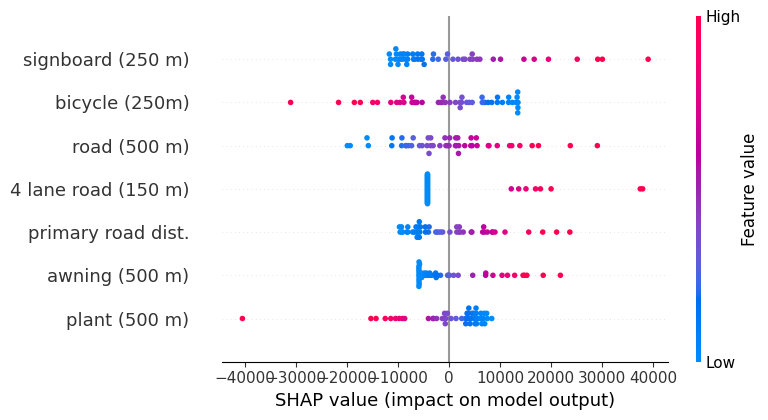

In [ ]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# create SHAP summary plot
shap.summary_plot(shap_values, X_train, max_display=10)


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


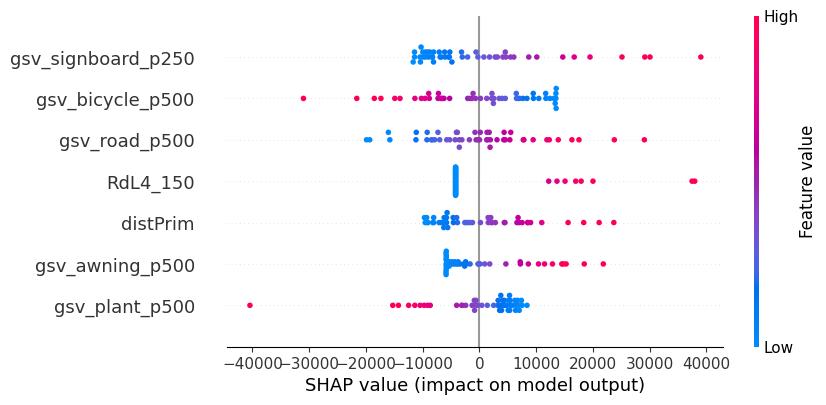

In [ ]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.plots.beeswarm(shap_values)

In [ ]:
type(shap_values)

shap._explanation.Explanation

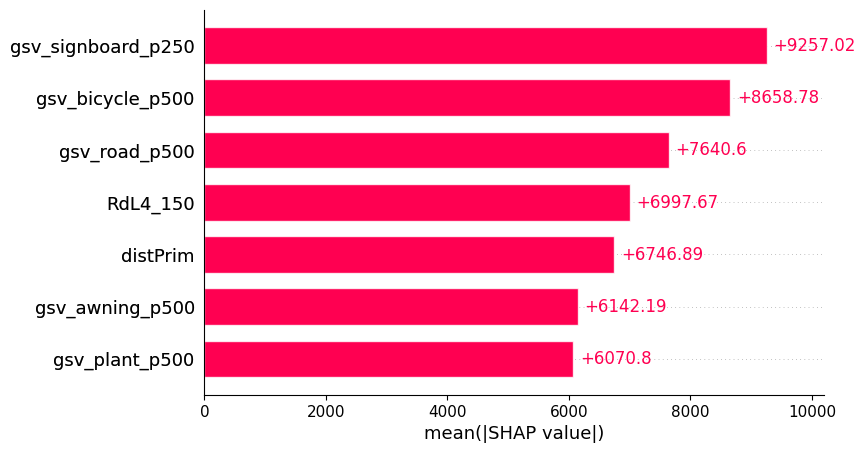

In [ ]:
shap.plots.bar(shap_values)

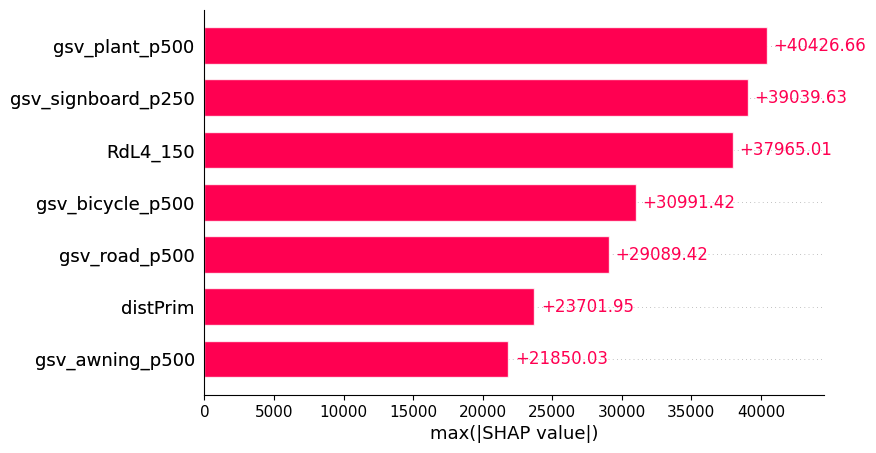

In [ ]:
shap.plots.bar(shap_values.abs.max(0))

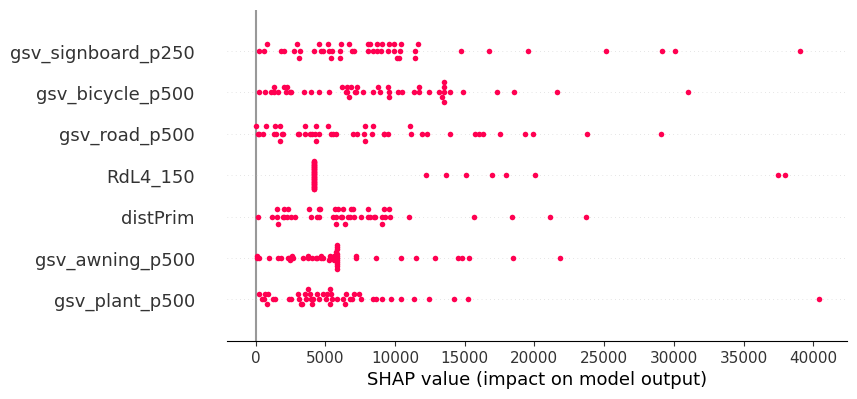

In [ ]:
shap.plots.beeswarm(shap_values.abs, color="shap_red")

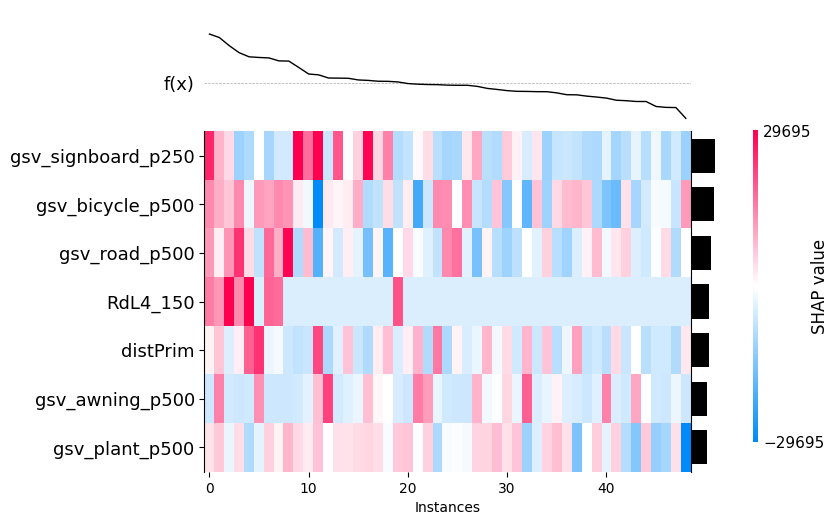

In [ ]:
# !pip uninstall matplotlib
# !pip install matplotlib==3.4.3

import matplotlib.pyplot as plt
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.plots.heatmap(shap_values[:49], instance_order=shap_values.sum(1))

In [ ]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer.shap_values(X_train)


AttributeError: ignored

In [ ]:
sample_ind = 1
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[sample_ind])

Exception: ignored

In [ ]:
explainer = shap.KernelExplainer(model.predict, X_train)
shap_values = explainer.shap_values(X_train)
# create SHAP summary plot
shap.summary_plot(shap_values, X_train)


Provided model function fails when applied to the provided data set.


ValueError: ignored

In [ ]:
type(shap_values)

shap._explanation.Explanation

In [ ]:
y

site_name
Agashadek_road           59028.649669
Lalbag                   58569.279266
Gulisthan                64935.501715
Polashi                  38339.927064
BUET                     24118.879680
Azimpur                  47317.606561
Z Hq Hall, DU            70079.378739
New_market               56186.175930
Bolaka Cinema Hall       76901.195880
TSC_DU                   66340.919538
Provat_home              20879.271000
Romna_park               36973.779659
Shimanto_square          49037.192222
Elephant_road            75226.519650
Shisu Park               62758.303778
Hatirpul Kacha bazar     99905.166671
Mirpur_6                 95339.953362
Eskaton                  80834.298400
Mouchak                 104356.673200
Dhanmondi_lake_park      29751.605905
Khilgaon                 43333.026138
Square_hospital          53968.550369
Labaid                  122675.043750
Farmgate                 54387.653638
Shangsad_bhaban          68758.594575
Rampura                  74959.984538
Mo

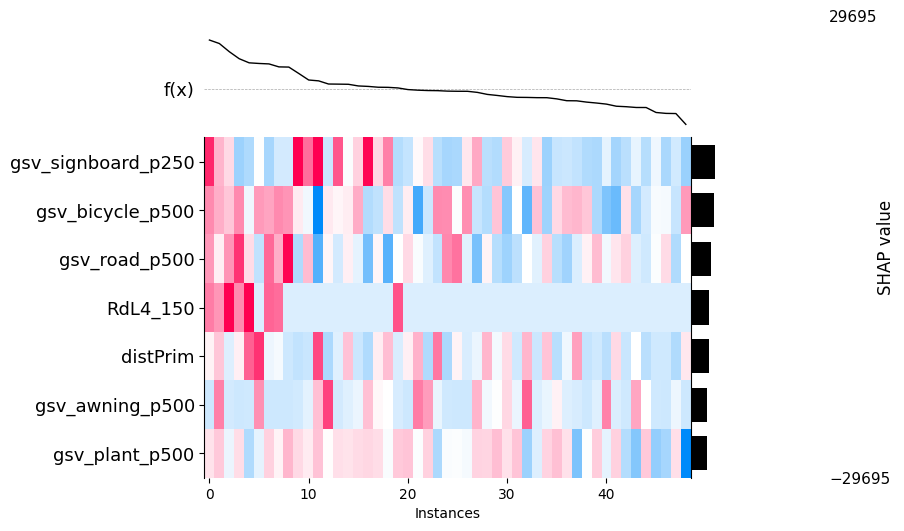

In [ ]:
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.plots.heatmap(shap_values[:49], instance_order=shap_values.sum(1))

In [ ]:
clustering = shap.utils.hclust(X_train, y)

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


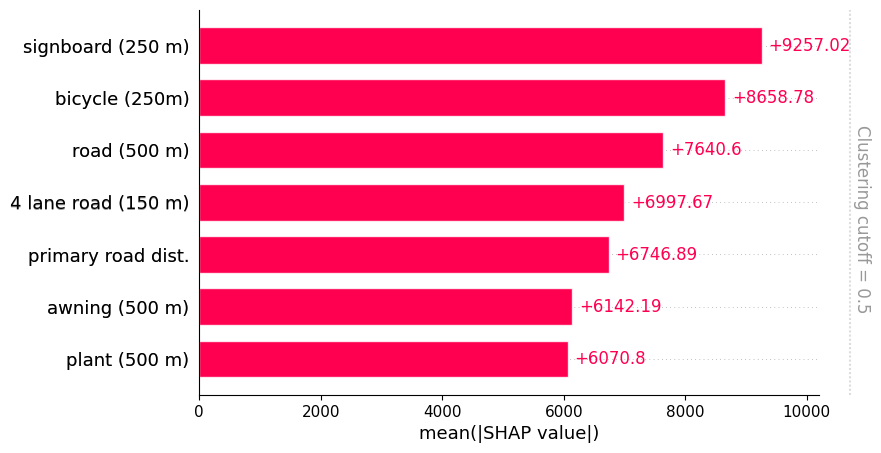

In [ ]:
shap.plots.bar(shap_values, clustering=clustering)

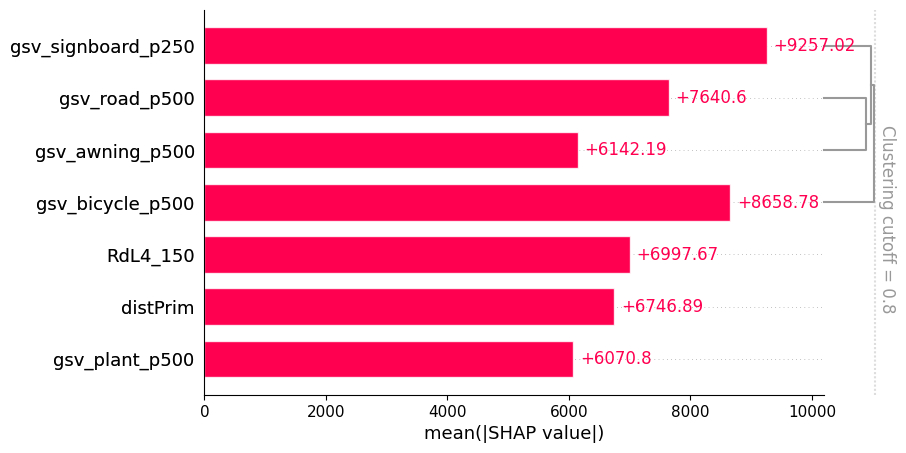

In [ ]:
shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=0.8)

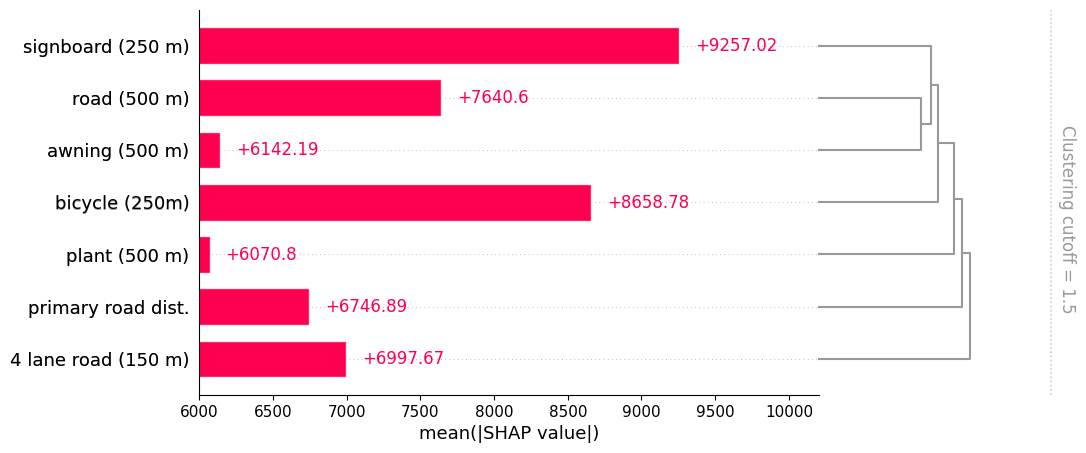

In [ ]:
bar_plot = shap.plots.bar(shap_values, clustering=clustering, clustering_cutoff=1.5, show=False)
plt.xlim(6000, plt.xlim()[1])  # Set the x-axis range starting from 4000
plt.show()

In [ ]:
shap.utils.plot_clustering_hierarchy(clustering)

AttributeError: ignored

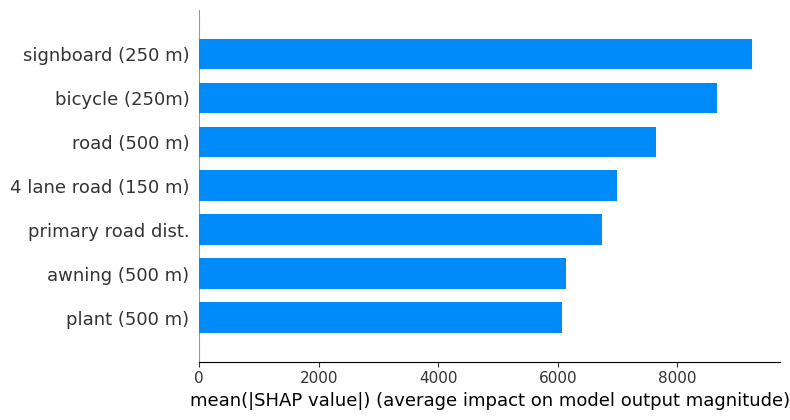

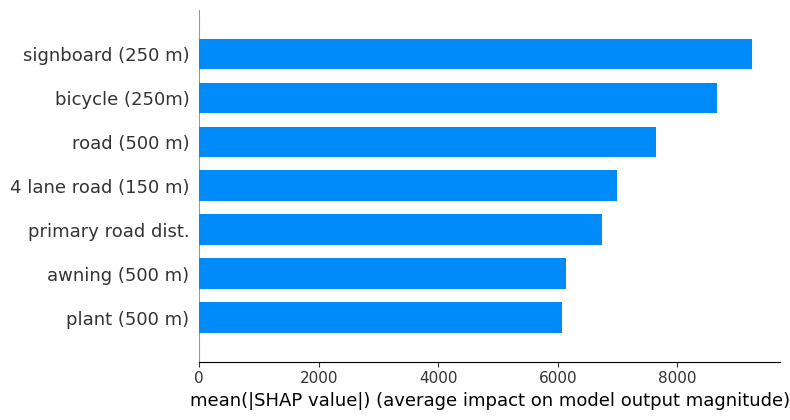

In [ ]:
# Create a PartitionExplainer
explainer2 = shap.PartitionExplainer(shap_values, clustering)

# Generate the summary plot
shap.summary_plot(shap_values, plot_type='bar')

# Show the plot
shap.summary_plot(shap_values, plot_type='bar')

In [ ]:
expected_value = explainer.expected_value

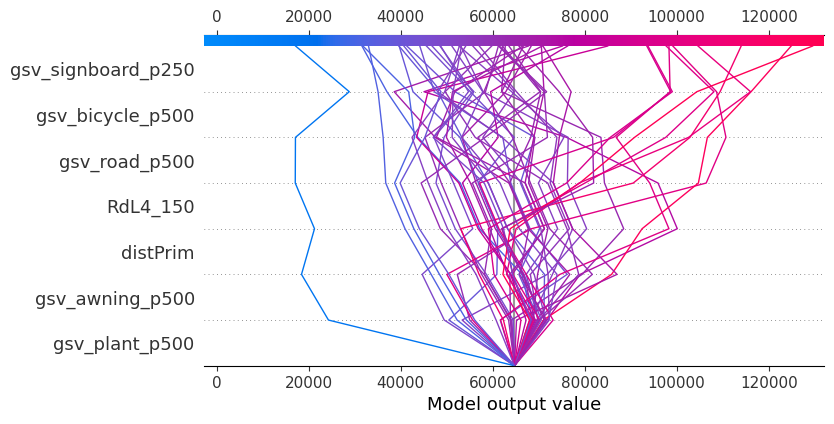

In [ ]:
shap.decision_plot(expected_value, explainer.shap_values(X_train),X_train.columns)

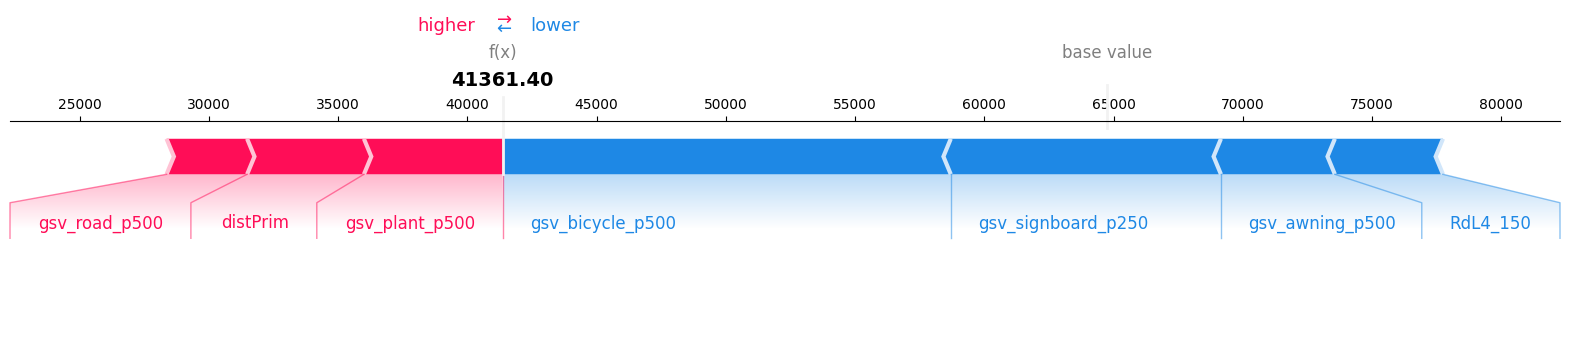

In [ ]:
shap.force_plot(expected_value,  explainer.shap_values(X_train[3:4]),X_train.columns,
                matplotlib=True)